In [5]:
### Analyze the experiment from January 2019, vgat inhibition during 
### three-choice olfactory gonogo (to match COSMOS data).
%load_ext autoreload
%autoreload 2
%matplotlib inline


from matplotlib import pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re

import scipy.stats

from cosmos.behavior.bpod_dataset import BpodDataset
import cosmos.behavior.bpod_io as bi
import cosmos.behavior.optogenetic_utils as ou



import matplotlib
matplotlib.rcParams.update({'xtick.major.pad': '2'})
matplotlib.rcParams.update({'ytick.major.pad': '2'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['pdf.fonttype'] = 42 # truetype
matplotlib.rcParams['ps.fonttype'] = 42


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
### Fill in all of dataset paths here. 

# Select dataset.
workstation = 'cosmosdata' #'analysis2'
if workstation == 'analysis2':
    base_path = '/home/izkula/Dropbox/cosmos_data/Behavior_bpod_vgat/'
    fig_save_path = '/home/izkula/Dropbox/cosmos/fig_plots/fig8/inhib_results' 
    load_fig_save_path = '/home/izkula/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/'

elif workstation == 'cosmosdata':
    base_path = '/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/'
    fig_save_path = '/home/user/Dropbox/cosmos/fig_plots/fig8/inhib_results' 
    load_fig_save_path = '/home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/'


datasets = [
    ### m15
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190112_173258', 'pre-m', 'm15'],  # good, 34
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190122_135402', 'pre-m', 'm15'], # good
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190120_185915', 'pre-a', 'm15'], # good
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190119_144928', 'pre-a','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20181229_123248', 'odor-m','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20181228_191008', 'odor-m','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190106_130004', 'odor-a','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190116_143930', 'odor-a','m15'], # good
    ['m15_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190110_132947', 'odor-led','m15'], # good
    ['m15_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190206_132726', 'odor-led','m15'], # okay. (led not quite in face)
    ['vGatm15_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190205_132718', 'pre-led','m15'], # good
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20181224_163113', 'pre-led','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190124_142146', 'odor-p','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190216_155741', 'odor-p','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190202_155417', 'odor-lat','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190203_170627', 'odor-lat','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190315_130903', 'odor-s','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190318_134950', 'odor-s','m15'], # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190313_125212', 'odor-v','m15'],  # good
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190308_132956', 'odor-v','m15'], # good
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190405_144416', 'pre-p','m15'], # good
    ['vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190407_171122', 'pre-p','m15'], # good
    
    ### m17
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190105_190126', 'pre-m','m17'], # good (though led not on every trial)
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190112_185223', 'pre-m','m17'], # good
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190106_143538', 'pre-a','m17'], # good
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190122_151653', 'pre-a','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190111_151253', 'odor-m','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190115_143331', 'odor-m','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190108_143556', 'odor-a','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190114_144034', 'odor-a','m17'], # good
    ['m17_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190110_144551', 'odor-led','m17'], # good
    ['m17_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190128_145644', 'odor-led','m17'], # good
    ['vGatm17_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190129_143059', 'pre-led','m17'], # good
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190104_141724', 'pre-led','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190123_143722', 'odor-p','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190125_143731', 'odor-p','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190131_125127', 'odor-lat','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190202_173044', 'odor-lat','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190309_160848', 'odor-s','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190318_142411', 'odor-s','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190308_140559', 'odor-v','m17'], # good
    ['vGatm17_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190326_141553', 'odor-v','m17'], # good
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190423_124950', 'pre-p','m17'], # good #
    ['vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190424_131306', 'pre-p','m17'], # good #
    
    ### thy1gc
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190109_124520', 'pre-m','thy1m1'], # good
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190115_123849', 'pre-m','thy1m1'], # good 
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190108_122840', 'pre-a','thy1m1'], # good 
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20181226_153830', 'pre-a','thy1m1'], # good
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190111_131238', 'odor-m','thy1m1'], # good 
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190116_140040', 'odor-m','thy1m1'], # good   ##
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190106_121712', 'odor-a','thy1m1'], # good 
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190122_130858', 'odor-a','thy1m1'], # good 
    ['thy1_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190112_164905', 'odor-led','thy1m1'], # LED DIDNT TURN ON? 
    ['thy1_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190128_130950', 'odor-led','thy1m1'], # good 
    ['thy1gc_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190205_121425', 'pre-led','thy1m1'], # good (though LED Not pointed at eye) 
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20181223_154445', 'pre-led','thy1m1'],  # good
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190123_123451', 'odor-p','thy1m1'], # good
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190125_132348', 'odor-p','thy1m1'], # good
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190201_122003', 'odor-lat','thy1m1'], # good
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190131_121250', 'odor-lat','thy1m1'], # good 
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190326_123131', 'odor-s','thy1m1'], # good
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190328_121924', 'odor-s','thy1m1'],  # good (though weirdly bright constantly)
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190325_122648', 'odor-v','thy1m1'], # **Hard to tell. 
    ['thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190327_122159', 'odor-v','thy1m1'], # **Something weird going on here...
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190408_131823', 'pre-p','thy1m1'], # good
    ['thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190409_111006', 'pre-p','thy1m1'], # LOOKS WEIRD.
    
    ### m16 
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190120_193441', 'pre-m','m16'], # good
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190209_145326', 'pre-m','m16'], # good 
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190112_181313', 'pre-a','m16'], # good 
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190131_142014', 'pre-a','m16'], # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20181229_132014', 'odor-m','m16'], # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190113_184334', 'odor-m','m16'], # good 
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190106_134648', 'odor-a','m16'], # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20181230_172906', 'odor-a','m16'], # good  
    ['m16_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190110_140932', 'odor-led','m16'], # good 
    ['m16_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190219_132718', 'odor-led','m16'],  # good 
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20181228_195123', 'pre-led','m16'], #  good 
    ['Vgatm16_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190220_121148', 'pre-led','m16'], # good 
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190210_180214', 'odor-p','m16'], # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190208_152754', 'odor-p','m16'],  # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190211_142259', 'odor-lat','m16'], # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190214_131522', 'odor-lat','m16'], # good 
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190317_163644', 'odor-s','m16'], # good
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190501_131244', 'odor-s','m16'], ### good #
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190416_125728', 'odor-v','m16'], # good #
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190422_124709', 'odor-v','m16'], # good #
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190331_175757', 'pre-p','m16'], # good
    ['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190426_141459', 'pre-p','m16'], # good #
    
    
    ### m12
     ['vGatm12_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190306_123125', 'pre-m','m12'], # good
     ['vGatm12_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190403_123748', 'pre-m','m12'], # good
     ['vGatm12_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190305_121734', 'pre-a','m12'], # good 
     ['vGatm12_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190402_121351', 'pre-a','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190210_184619', 'odor-m','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190227_130545', 'odor-m','m12'], # good 
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190228_124225', 'odor-a','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190317_155400', 'odor-a','m12'], # good 
     ['vGatm12_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190207_121318', 'odor-led','m12'], # good
     ['vGatm12_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190206_125513', 'odor-led','m12'], # good 
     ['vGatm12_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190208_143810', 'pre-led','m12'], # good
     ['vGatm12_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190209_141715', 'pre-led','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_124842', 'odor-p','m12'], # video doesn't work. presumably stimmed though. 
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190226_124704', 'odor-p','m12'], # good 
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190323_171759', 'odor-lat','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190416_114507', 'odor-lat','m12'], # good #
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190308_121720', 'odor-s','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190326_130642', 'odor-s','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190331_171741', 'odor-v','m12'], # good
     ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190410_121709', 'odor-v','m12'], # good #
     ['vGatm12_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190423_121357', 'pre-p','m12'],  # good #
     ['vGatm12_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190417_121544', 'pre-p','m12'], # good #
    
#     ### m14
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190216_172354', 'pre-m','m14'], # good
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190228_131928', 'pre-m','m14'], # good
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190301_140616', 'pre-a','m14'], # good 
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190226_132347', 'pre-a','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190214_142721', 'odor-m','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190227_135808', 'odor-m','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190218_134511', 'odor-a','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190223_154746', 'odor-a','m14'], # good 
    ['vGatm14_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190219_125432', 'odor-led','m14'], # good
    ['vGatm14_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190304_131128', 'odor-led','m14'], # good
    ['vGatm14_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190213_140455', 'pre-led','m14'], # good
    ['vGatm14_StimHDMI_preodorLED_COSMOSTrainMultiBlockGNG_20190212_134635', 'pre-led','m14'],  # good 
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_132901', 'odor-p','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190225_142613', 'odor-p','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190306_131025', 'odor-lat','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190417_125119', 'odor-lat','m14'], # good #
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190310_150751', 'odor-s','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190317_175941', 'odor-s','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190313_121707', 'odor-v','m14'], # good
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190320_125804', 'odor-v','m14'], # good
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190404_121659', 'pre-p','m14'], # good
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190405_141013', 'pre-p','m14'], # good
    
    
    #['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190305_125328', 'odor-lat','m14'], # **NO STIM?? (also no effect...)
    #['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190329_130952', 'odor-s','m16'],  # ***LOOOKS WEIRD!!!!
    #['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190328_125411', 'odor-v','m16'],  # ***LOOKS WEIRD??
    #['Vgatm16_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190402_125247', 'pre-p','m16'], #  ***NO STIM
]



In [7]:
%pdb

Automatic pdb calling has been turned OFF


/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm15/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190112_173258.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm15/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190122_135402.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm15/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190120_185915.mat
stim_inte

lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034


/home/user/anaconda3/envs/cosmostools3_keras222_mplt21_2/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm15/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm15_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190407_171122.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm17/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190105_190126.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm17/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Sess

lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm17/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190423_124950.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm17/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm17_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190424_131306.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosm

/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/thy1gc6m/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190325_122648.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/thy1gc6m/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/thy1gc6m_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190327_122159.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/thy1gc6m/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/thy1gc6m_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190408_131823.mat
stim_interval  

lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/Vgatm16/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190501_131244.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/Vgatm16/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190416_125728.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Beha

/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm12/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190416_114507.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm12/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190308_121720.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm12/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190326_130642.mat
stim_interval  [2.2 3.2]
li

lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm14/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190306_131025.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm14/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190417_125119.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/summary_inhibition_plots/licks.png
/home/user/Dropbox/cosmos_data/Beha

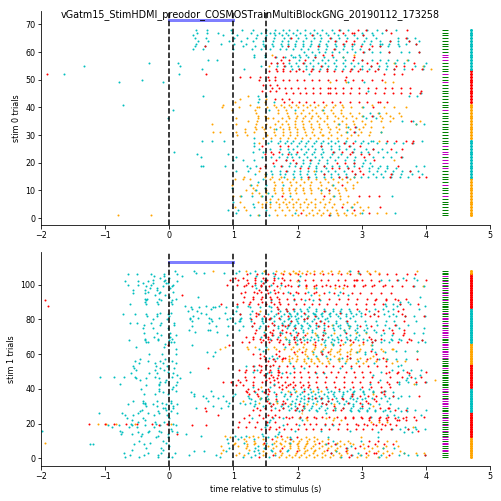

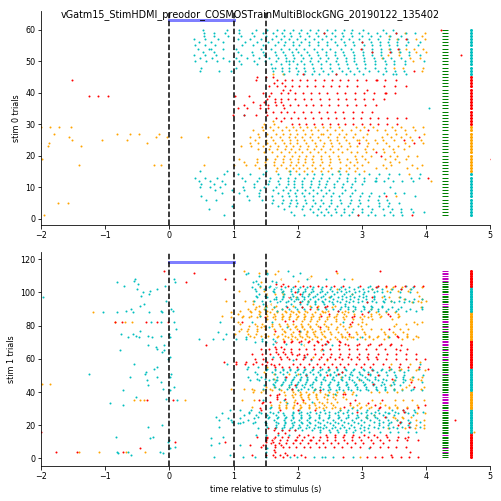

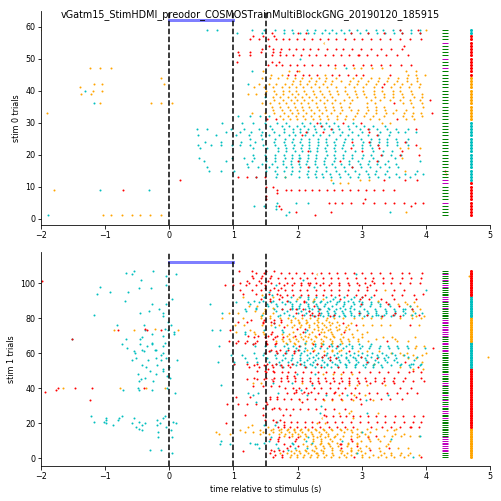

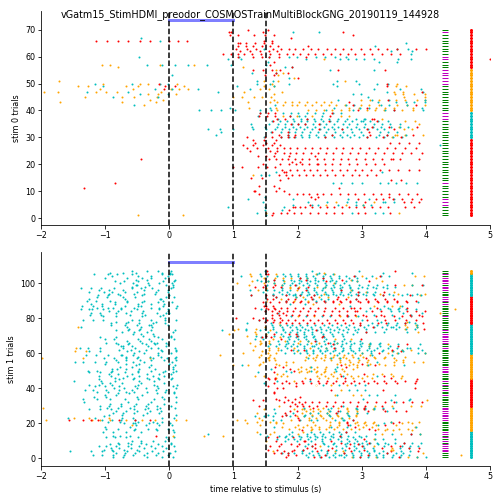

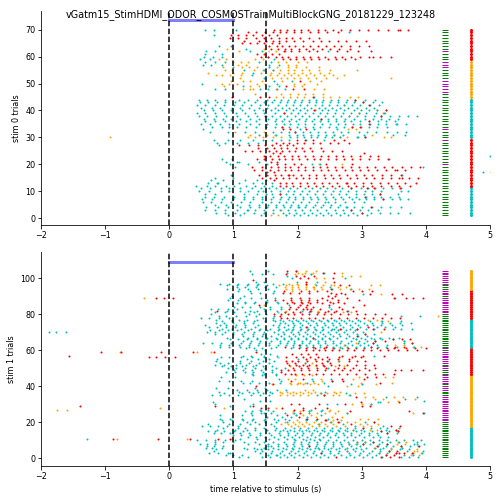

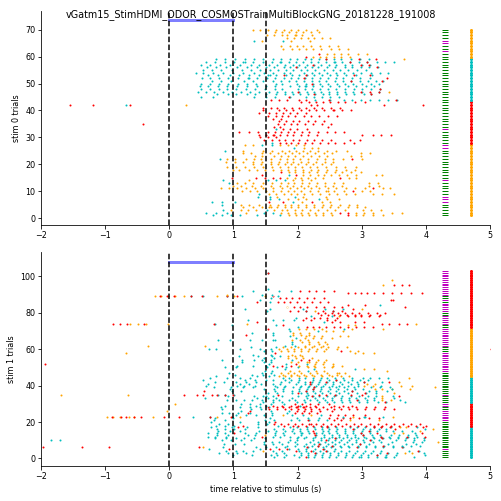

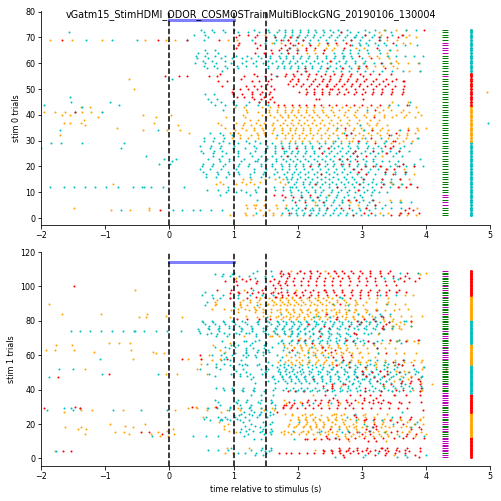

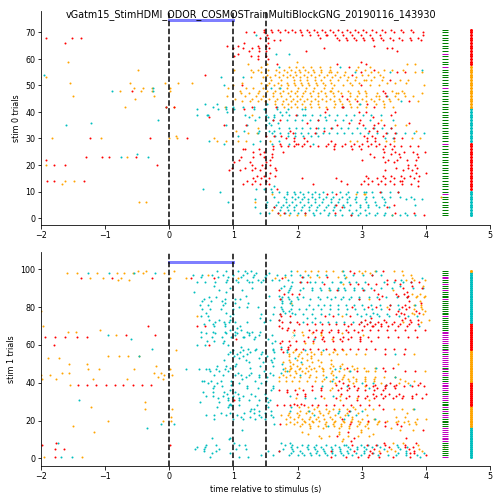

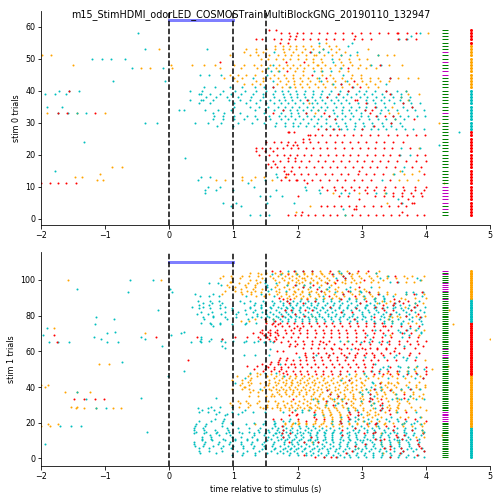

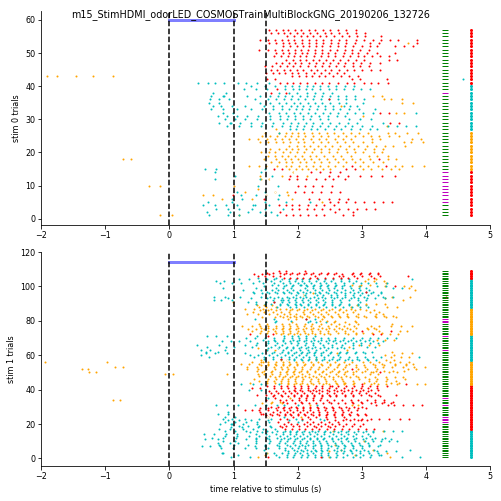

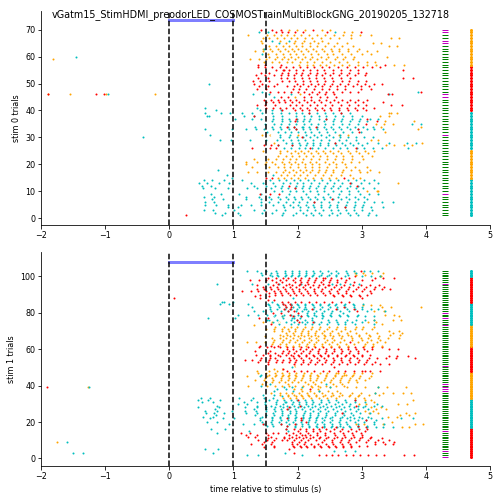

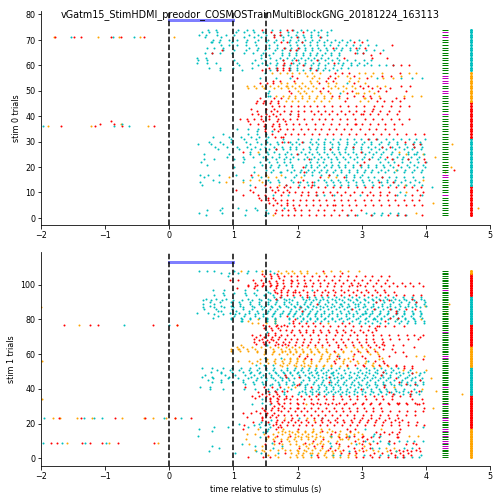

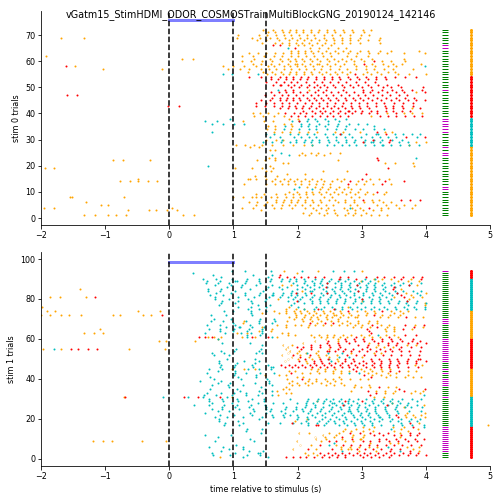

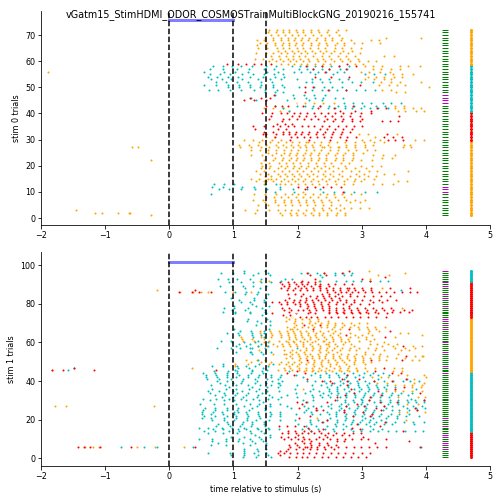

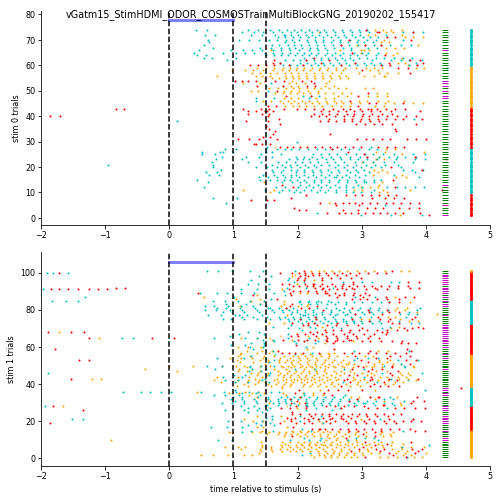

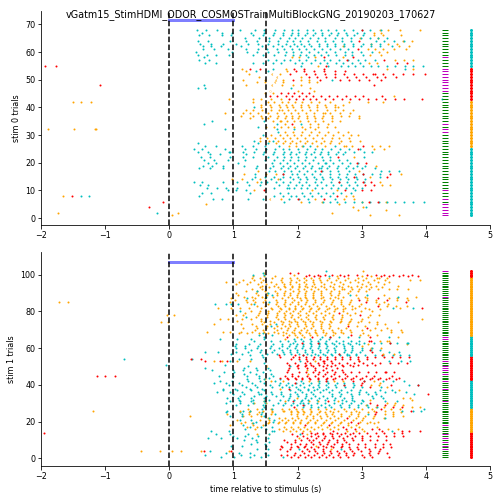

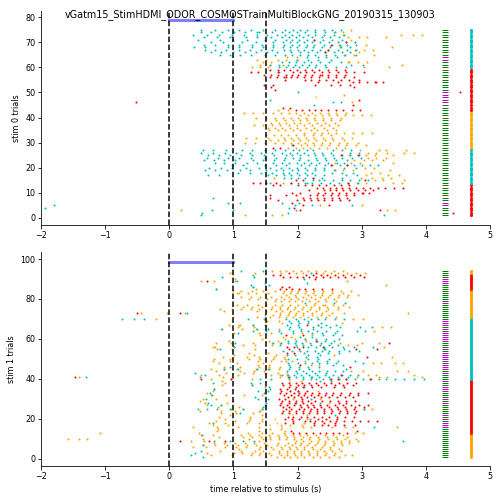

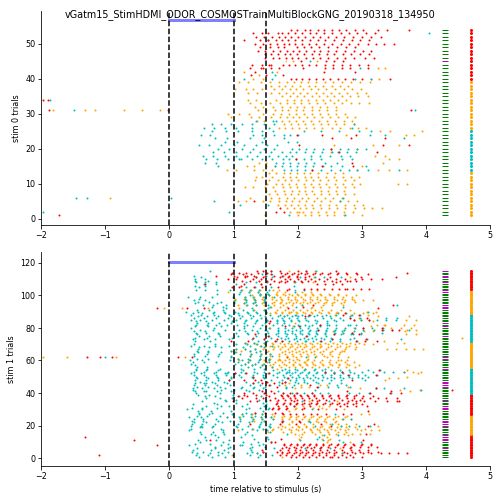

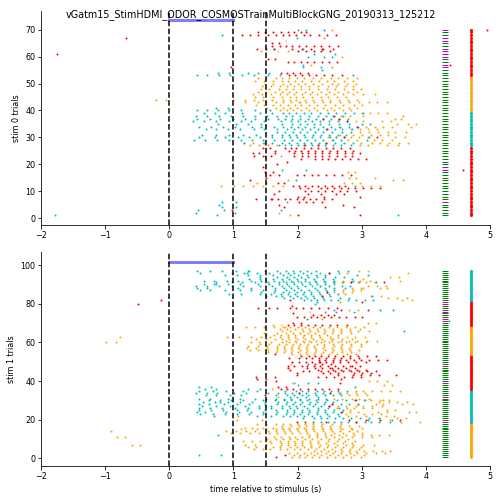

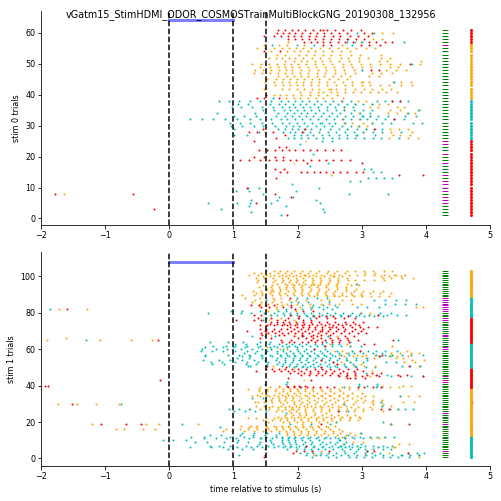

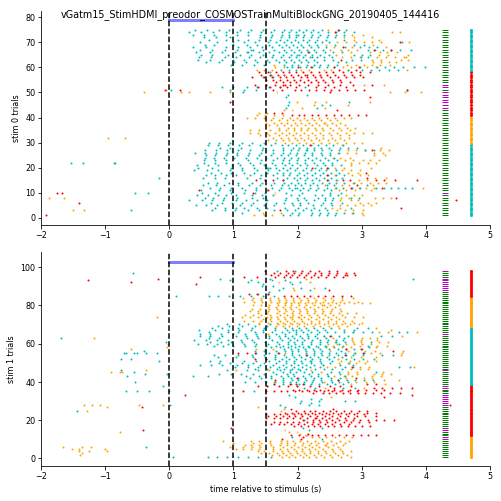

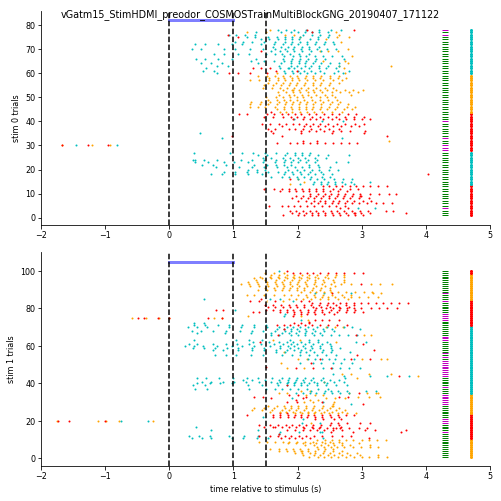

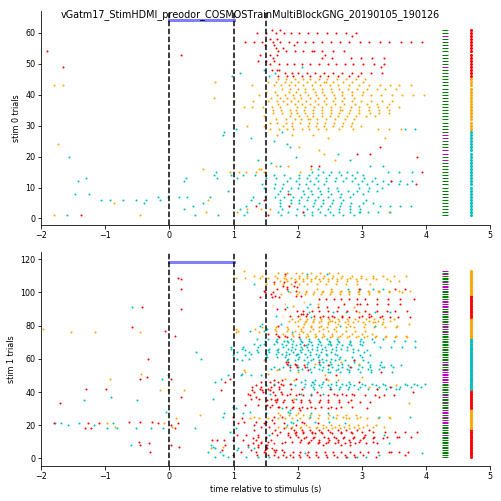

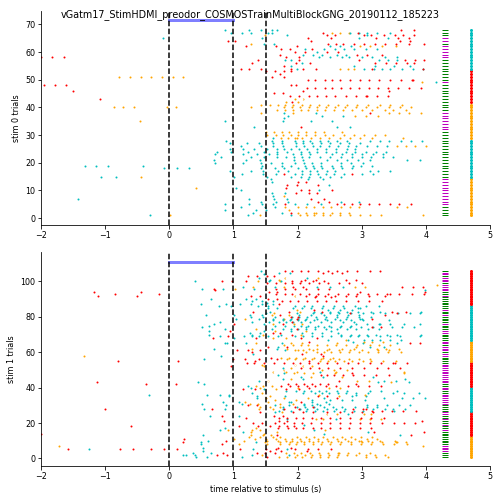

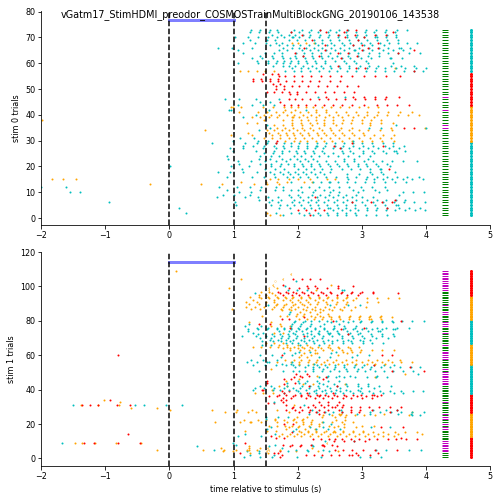

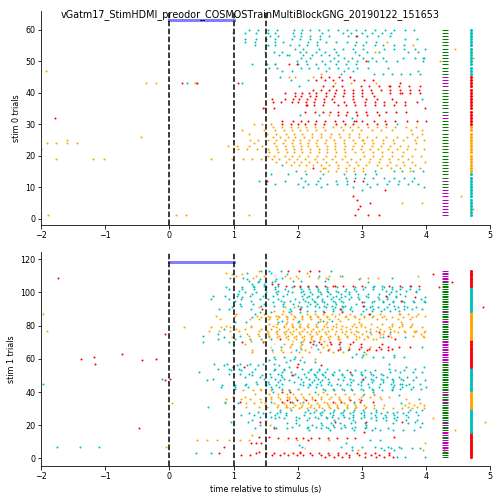

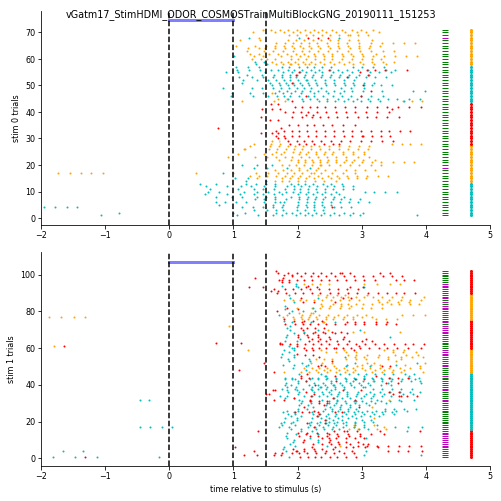

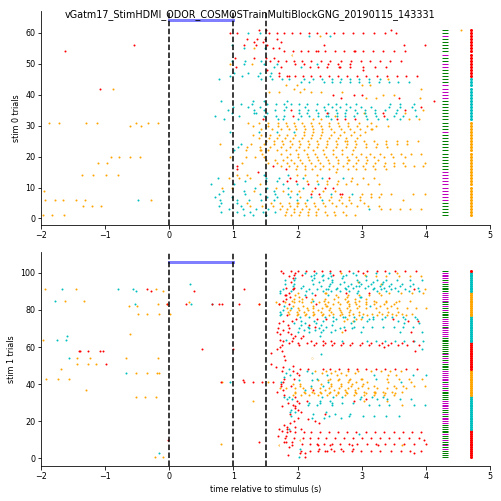

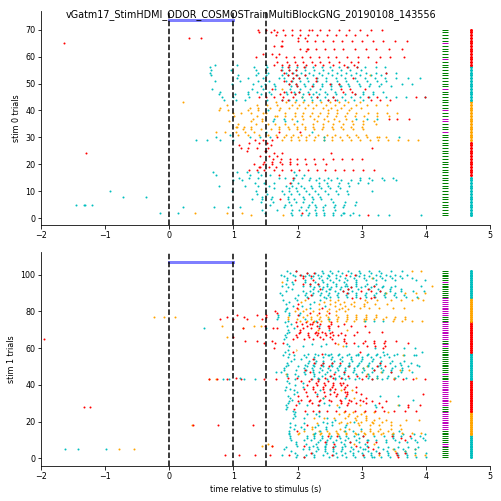

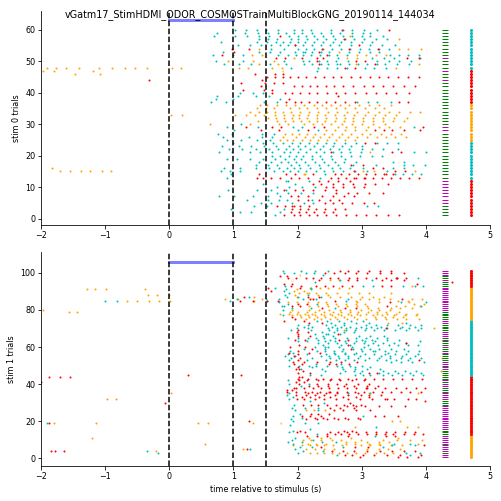

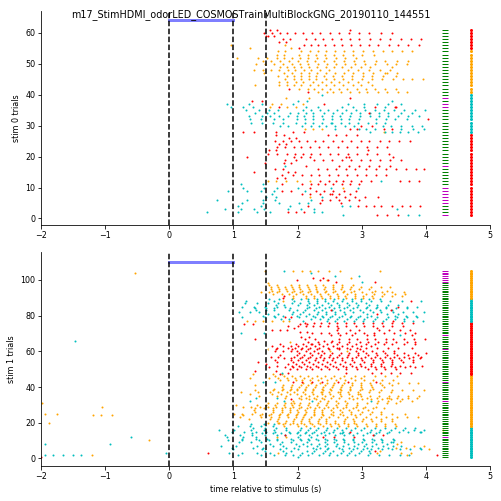

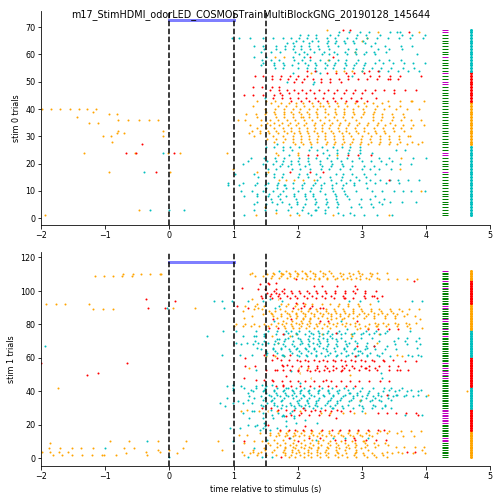

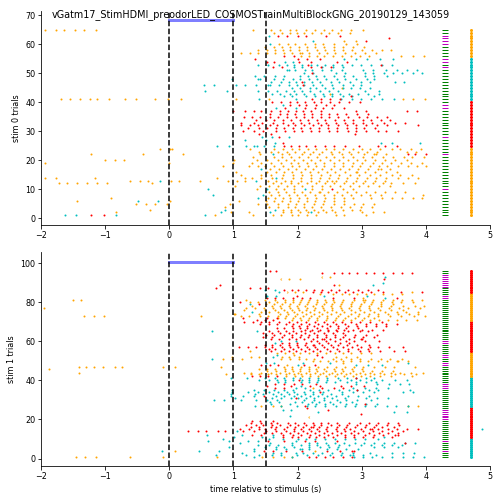

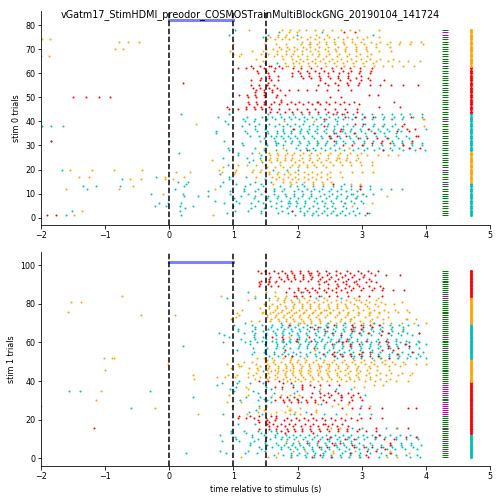

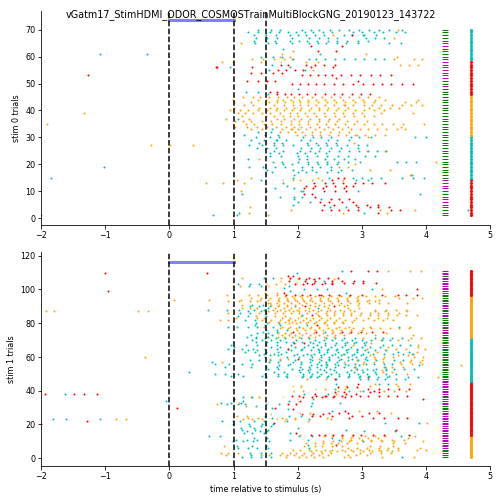

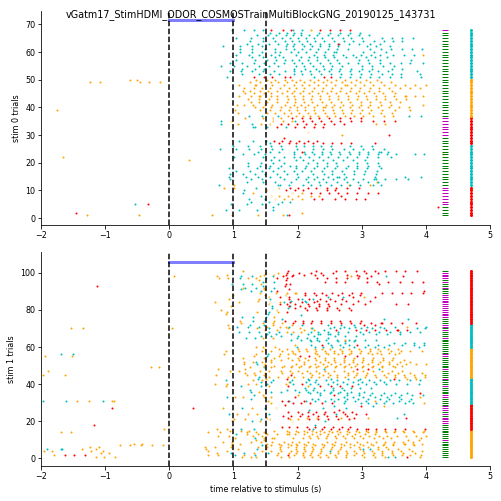

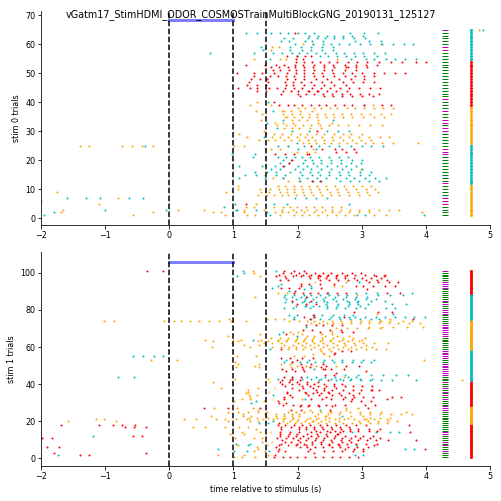

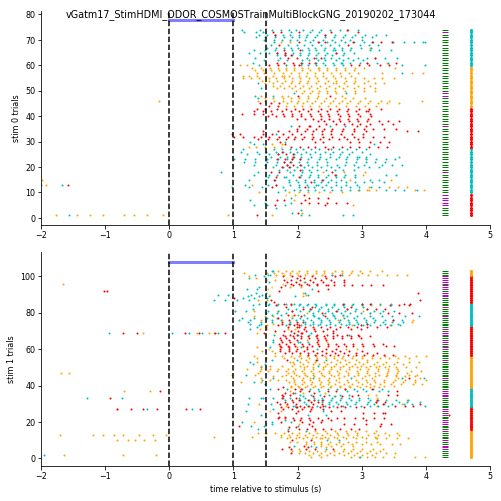

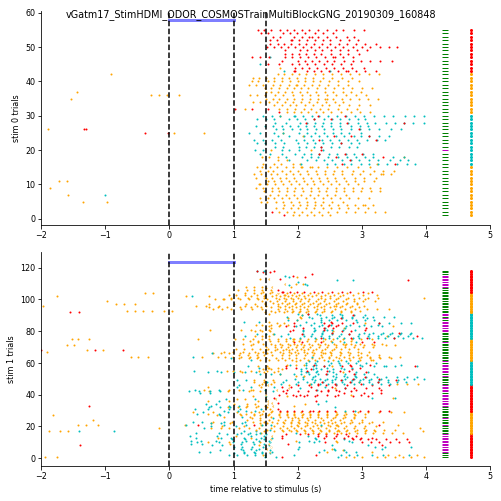

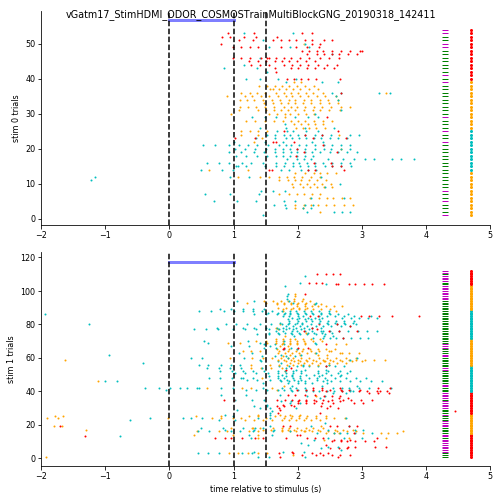

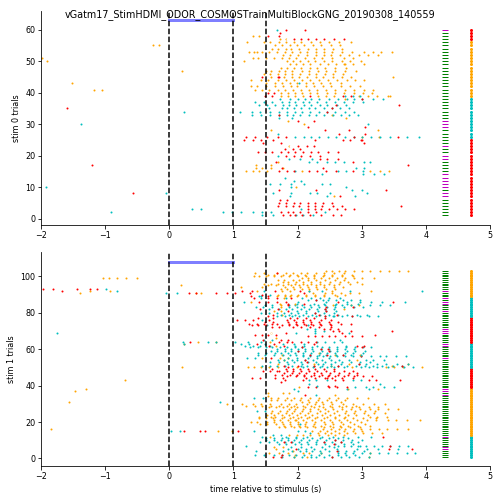

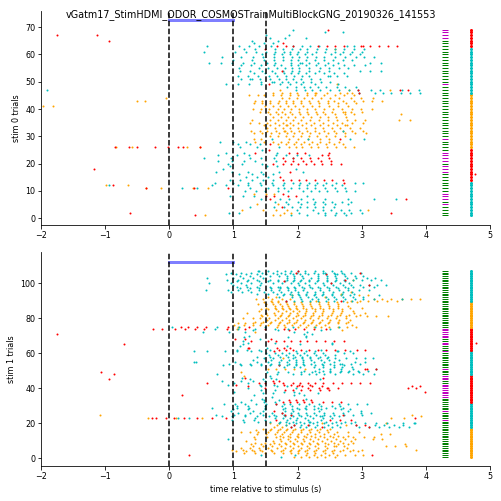

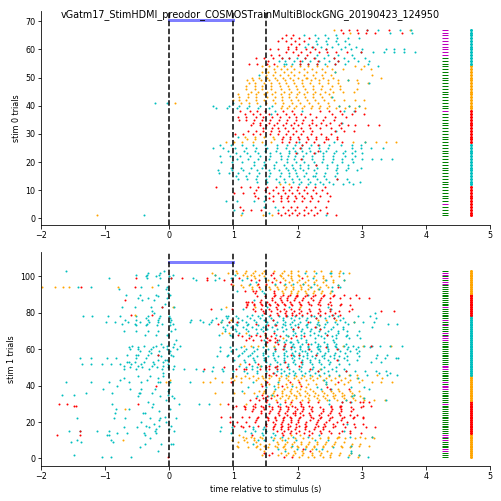

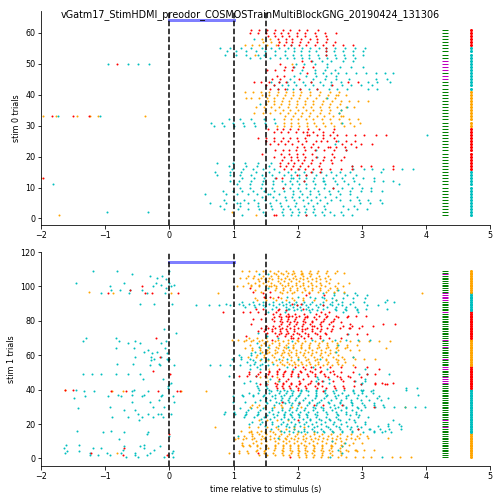

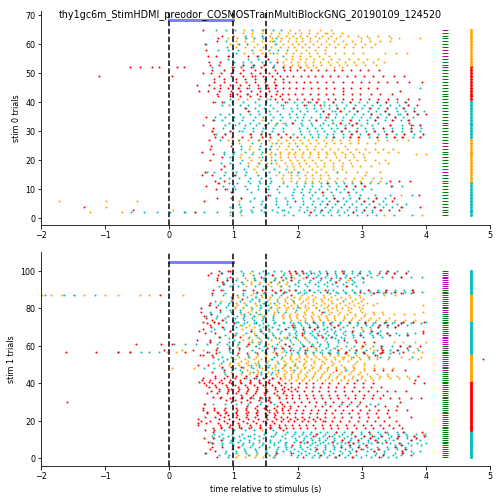

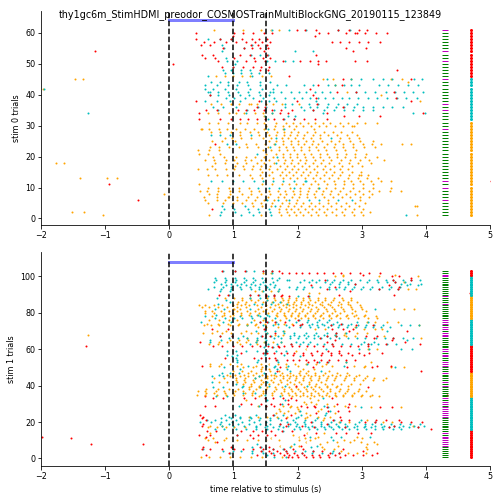

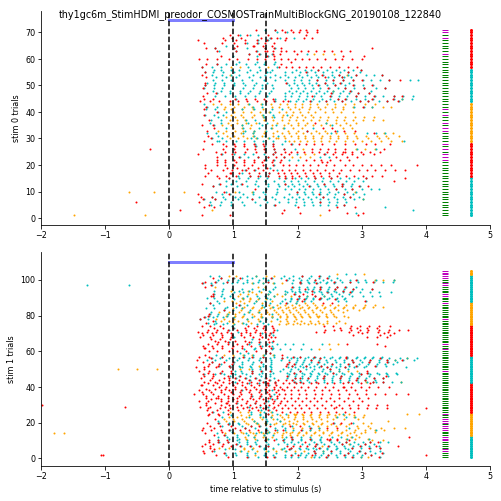

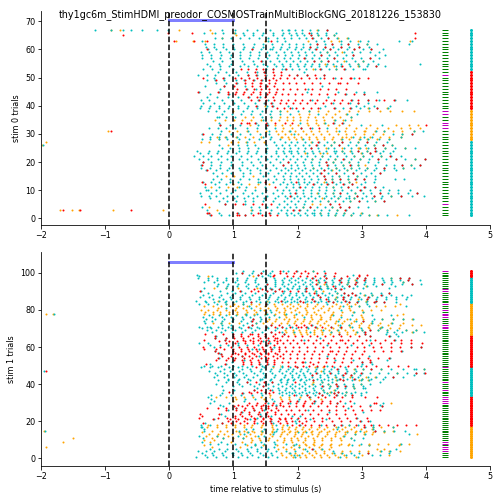

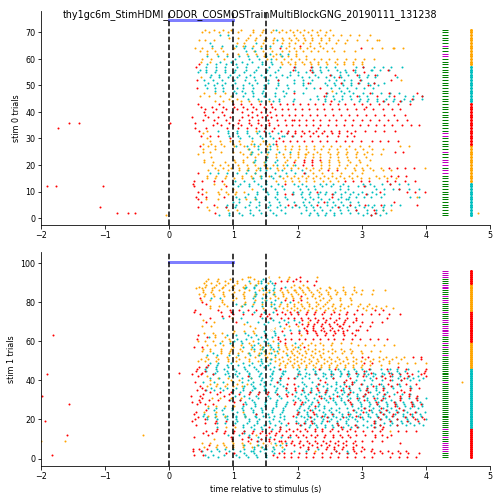

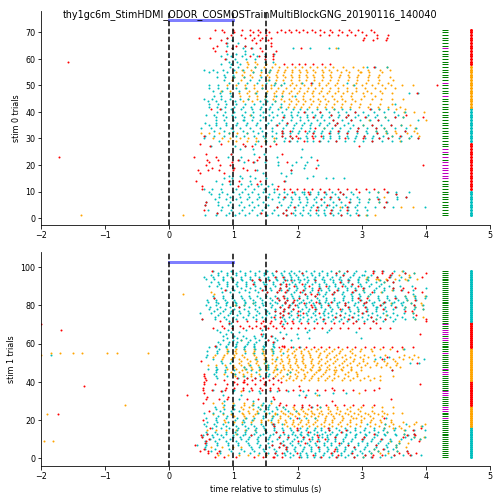

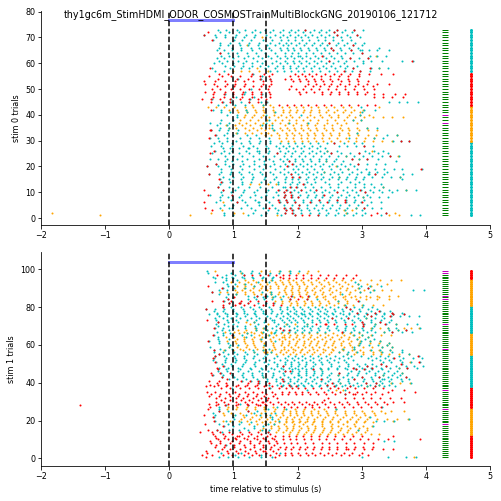

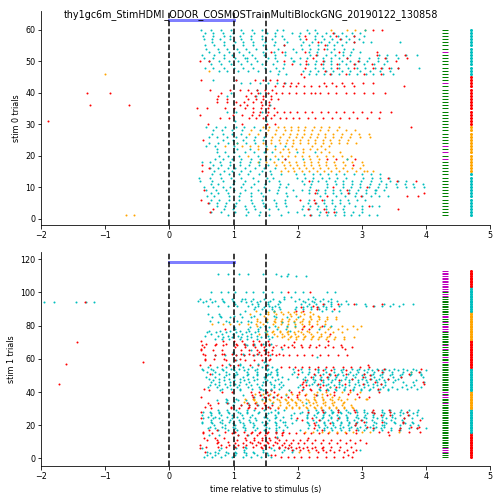

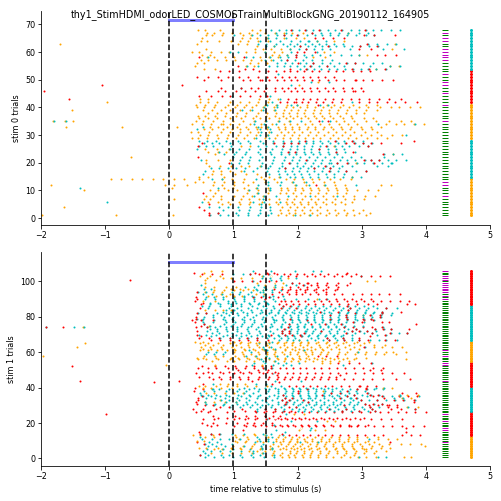

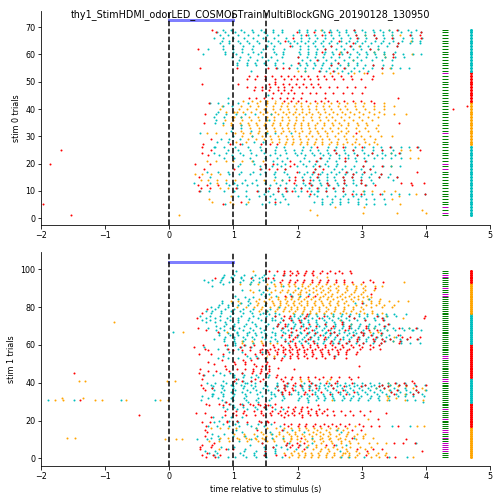

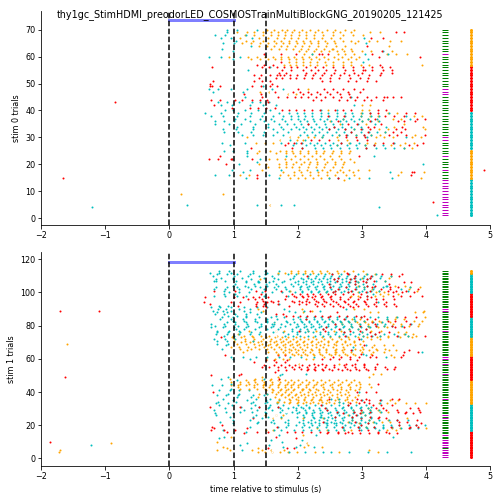

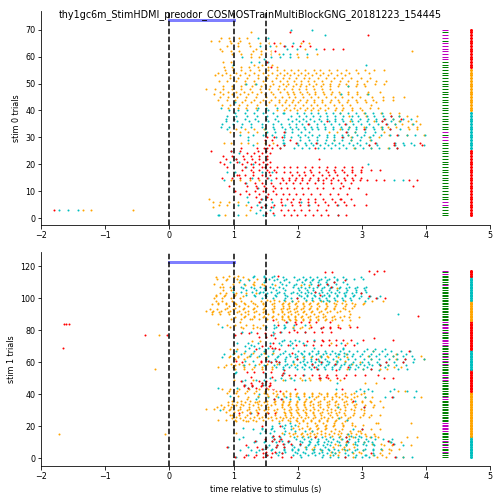

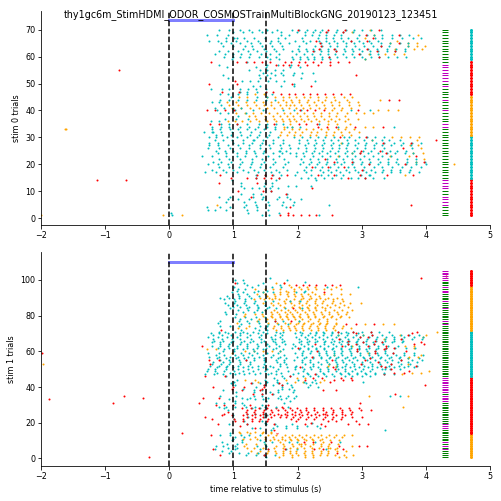

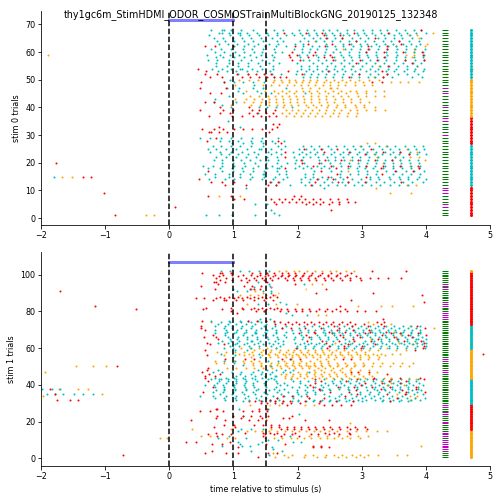

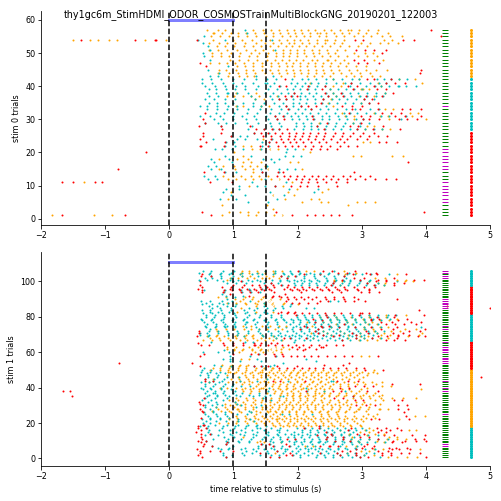

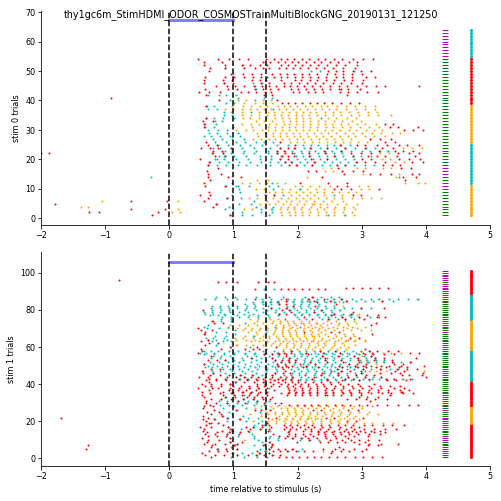

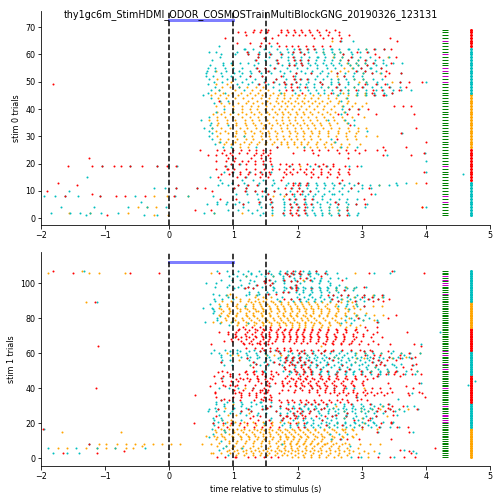

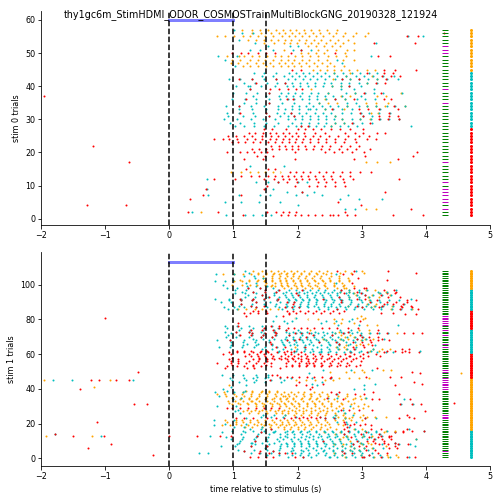

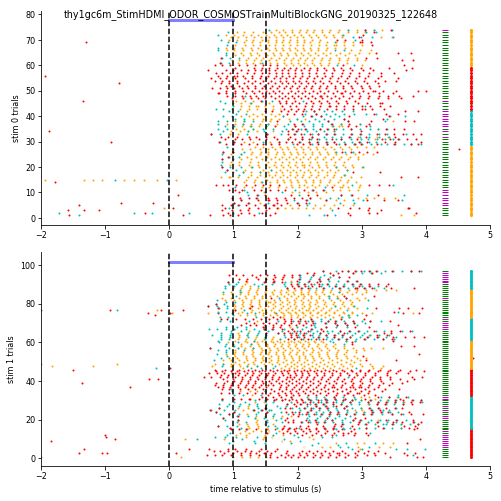

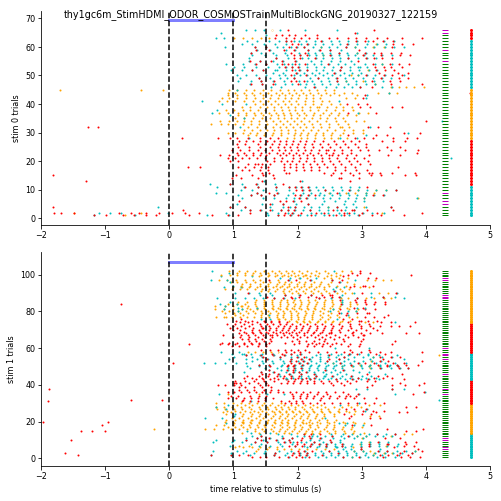

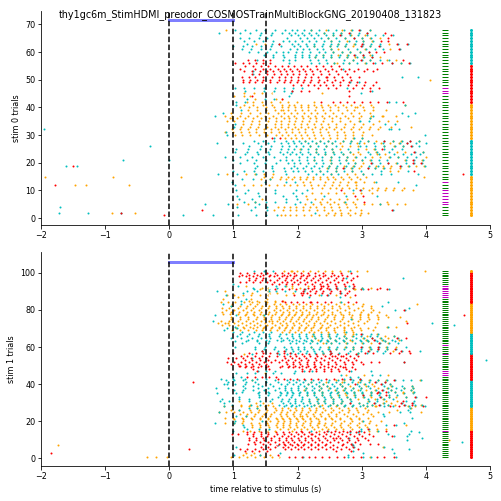

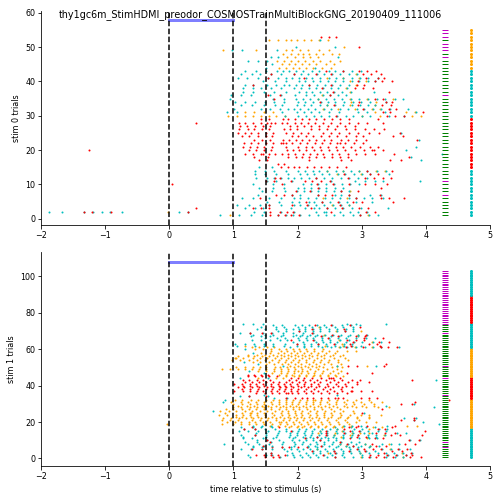

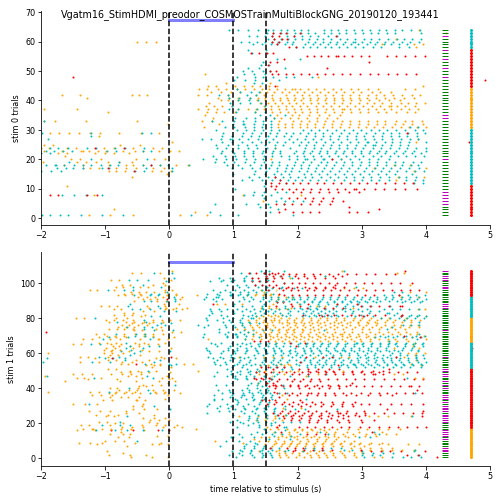

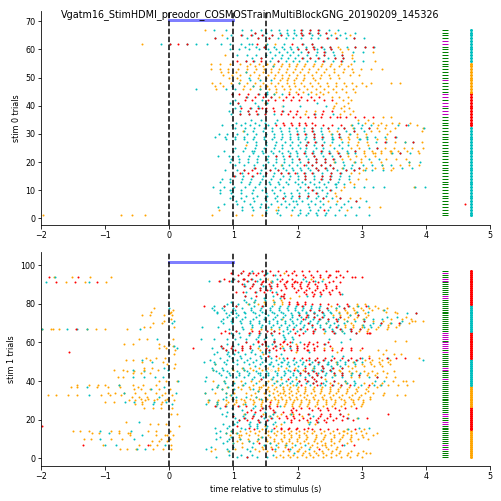

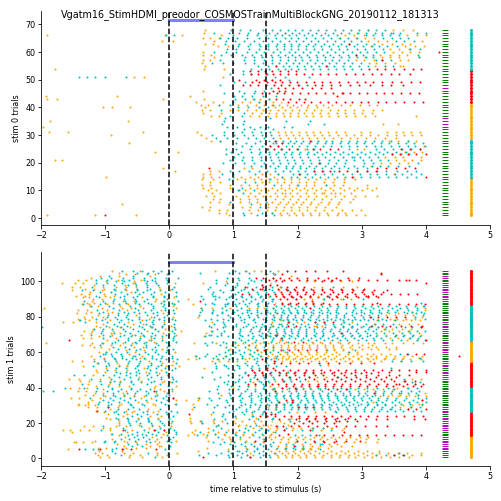

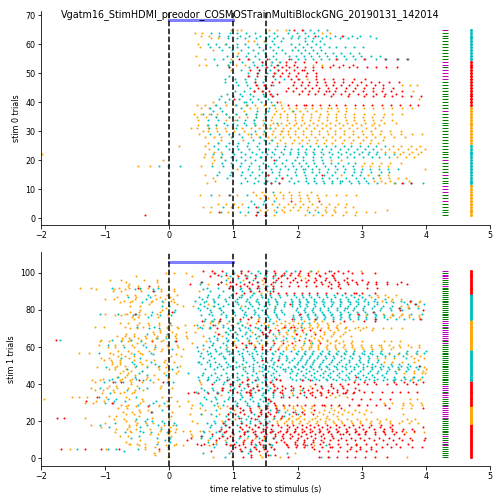

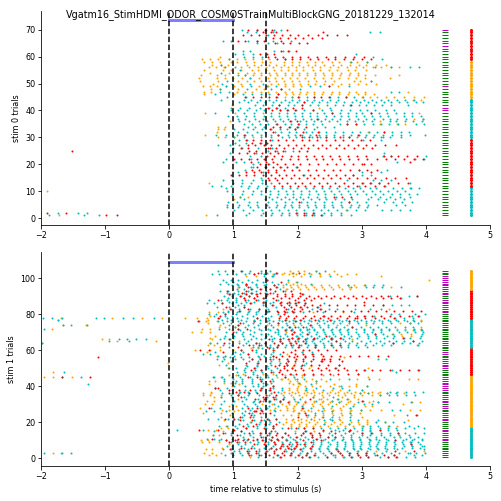

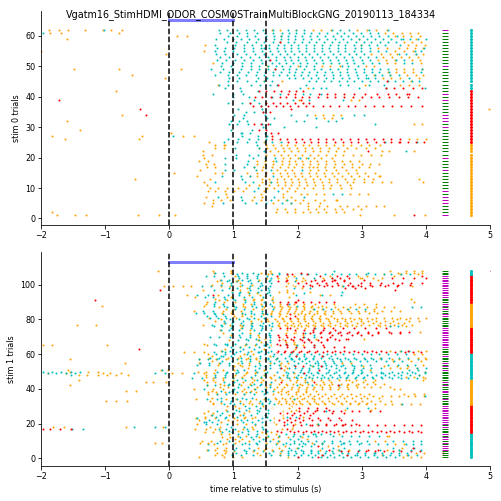

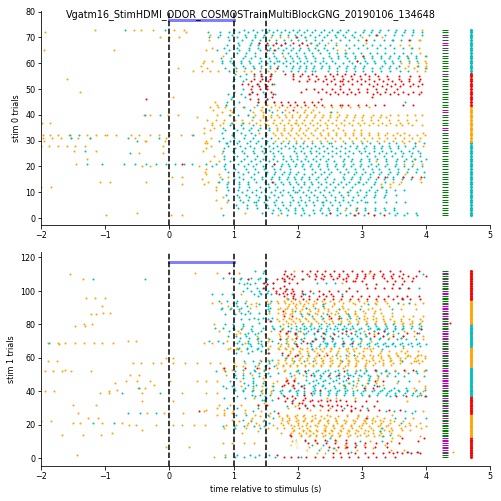

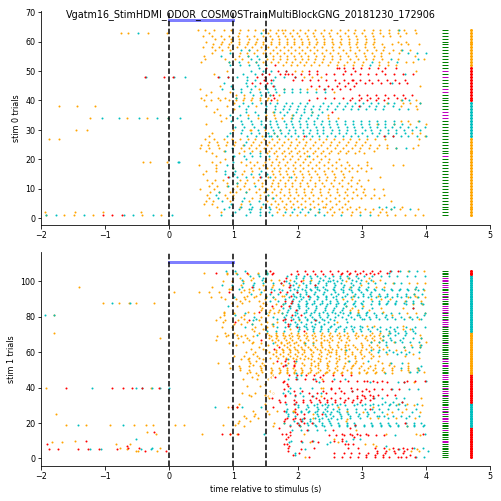

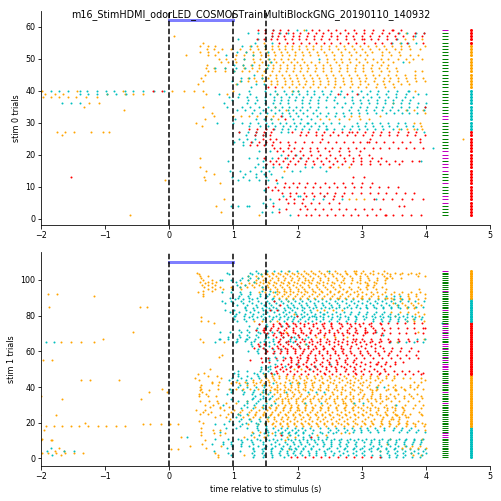

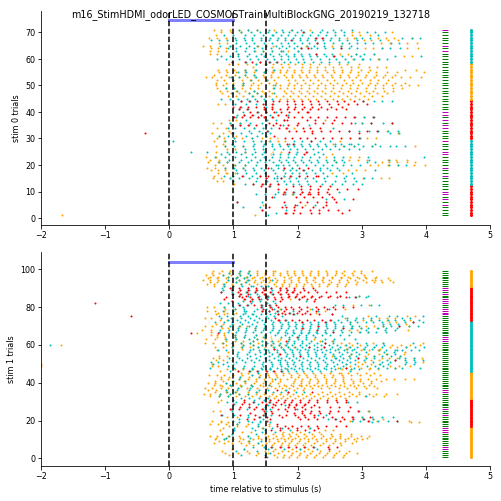

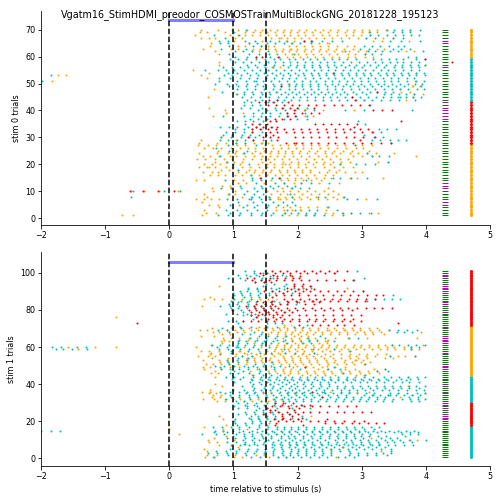

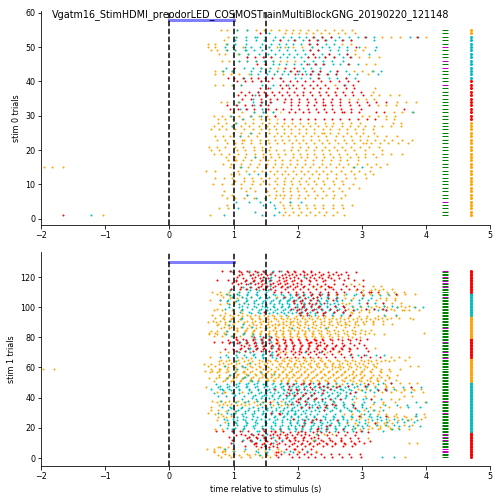

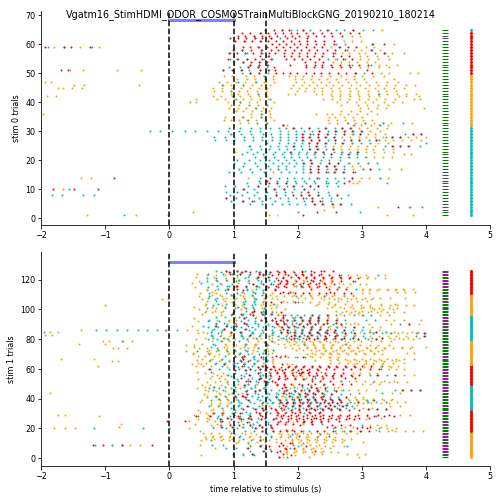

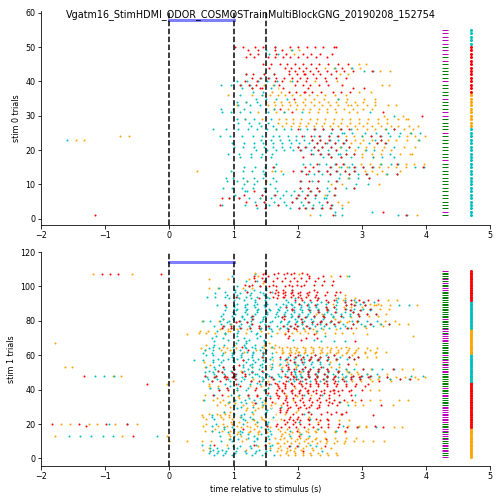

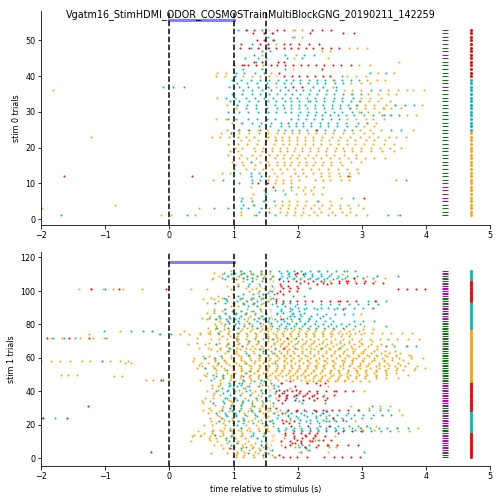

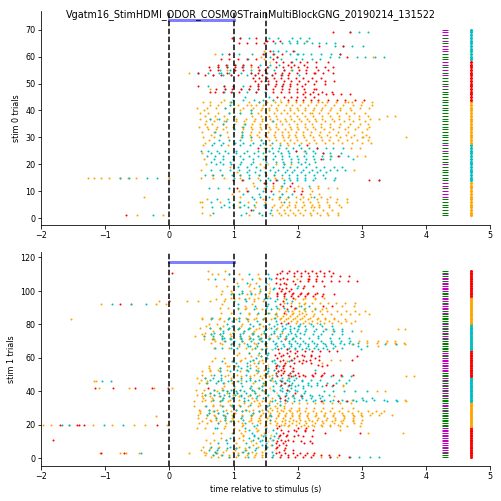

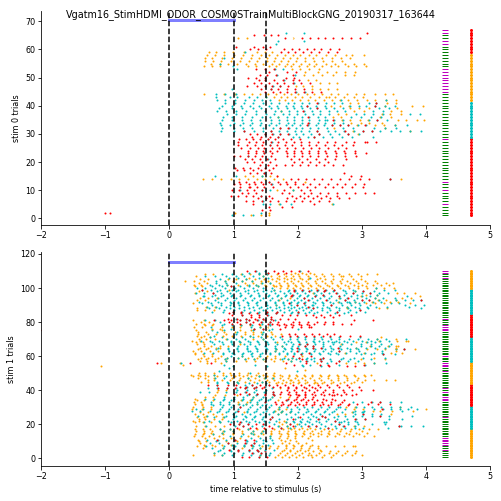

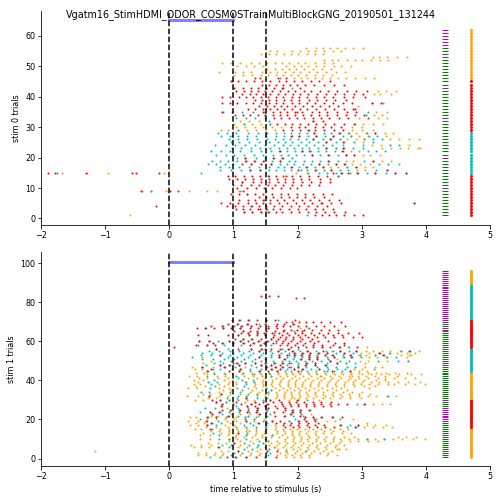

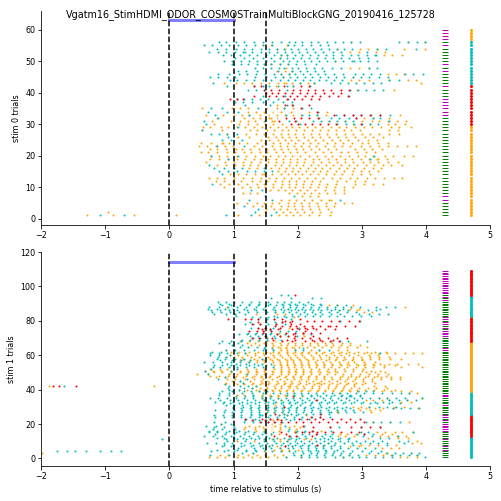

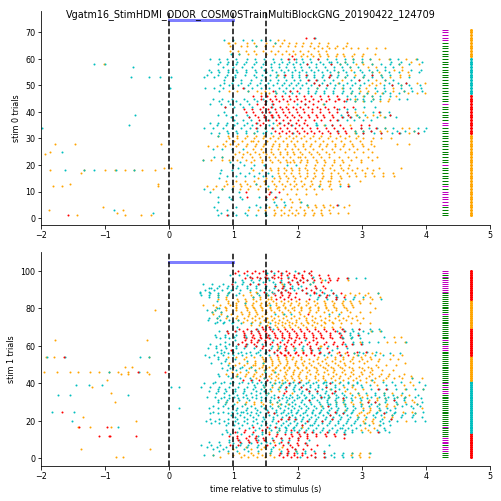

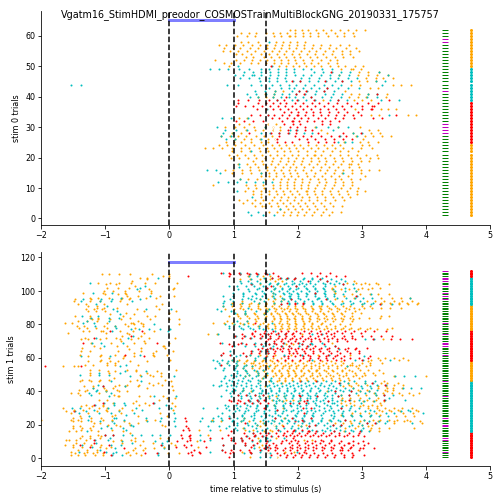

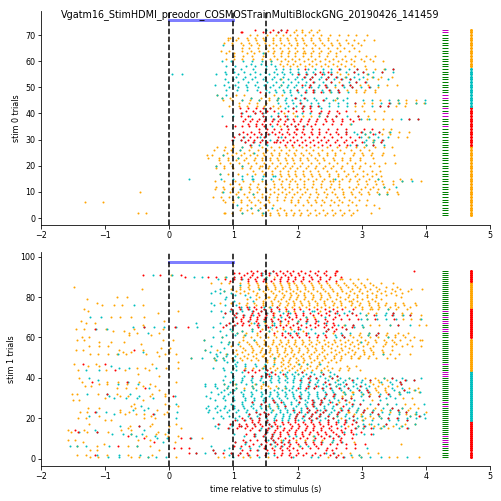

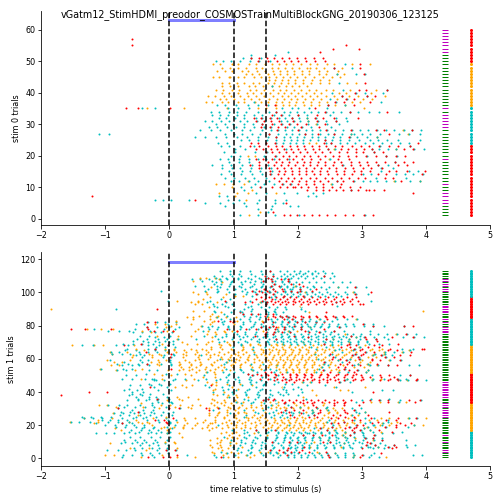

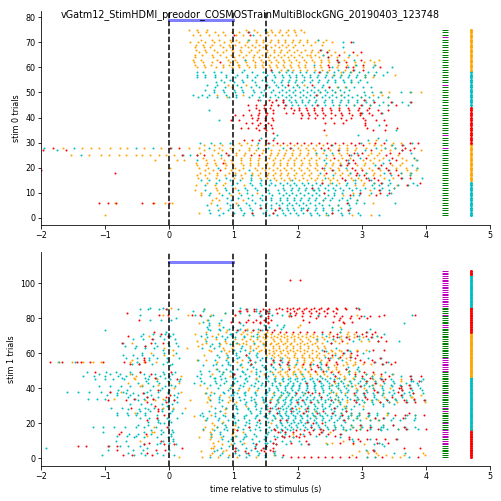

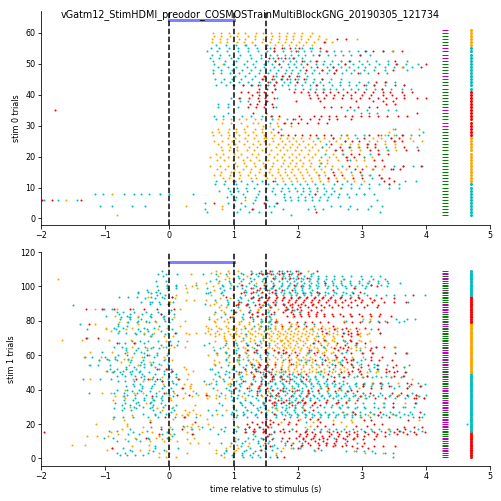

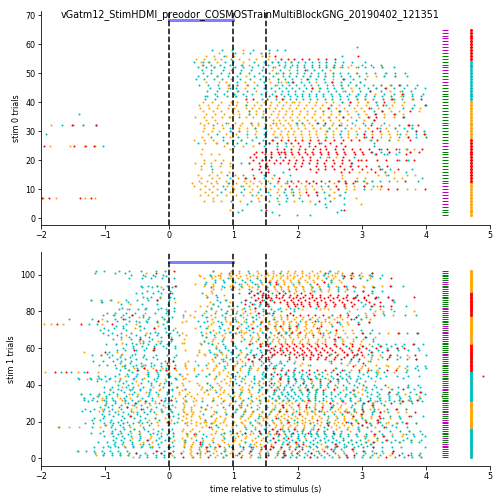

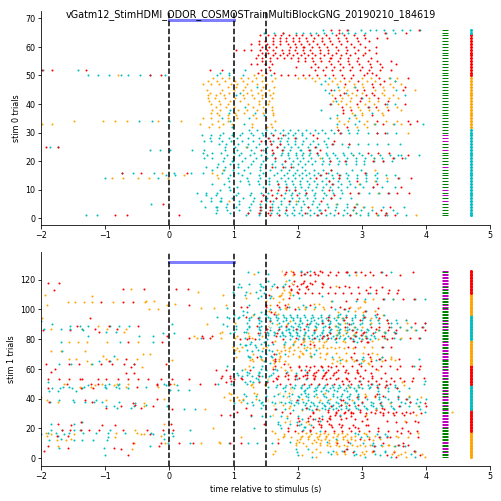

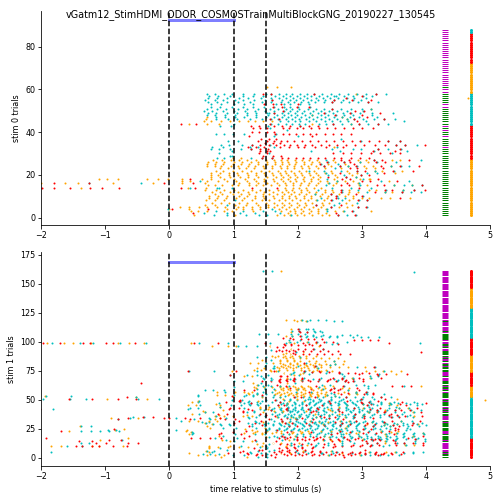

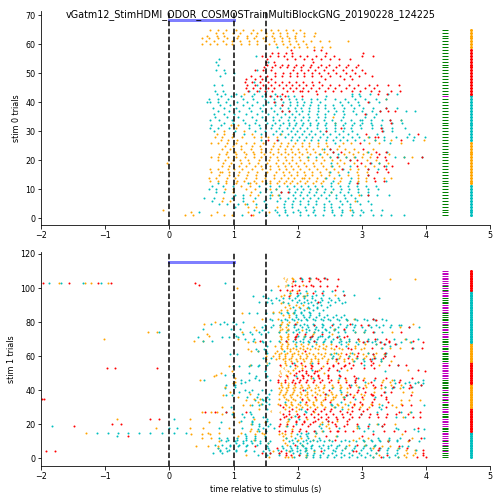

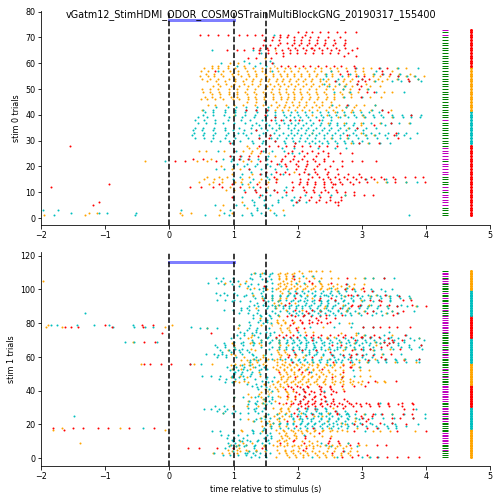

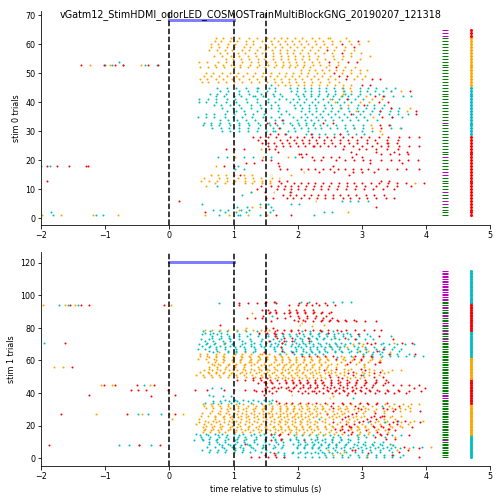

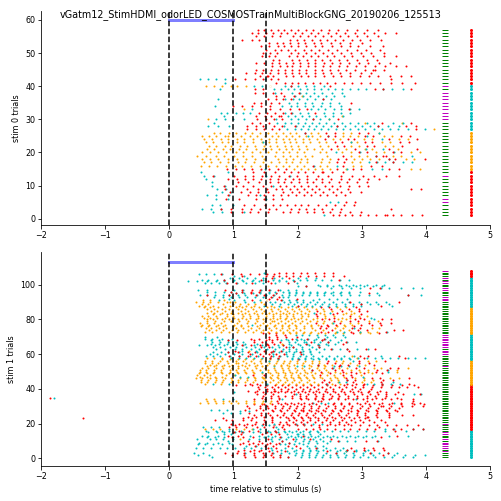

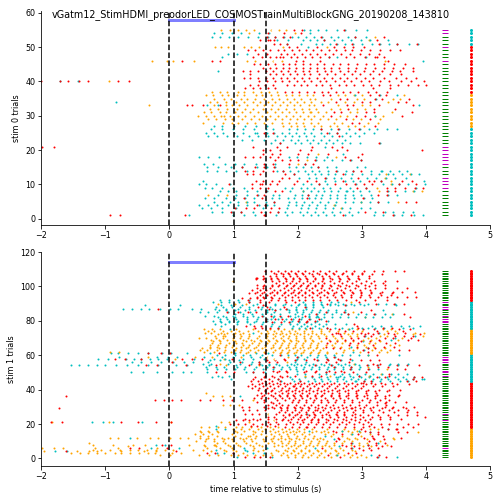

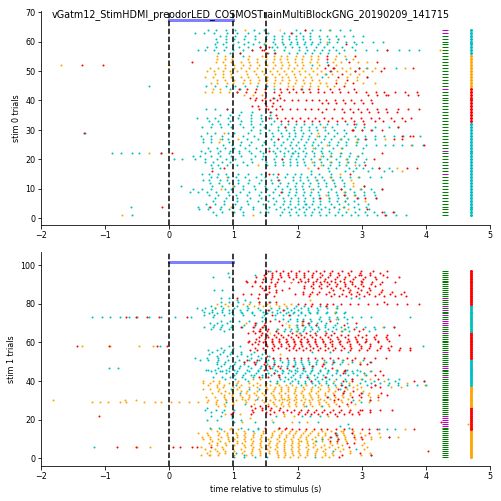

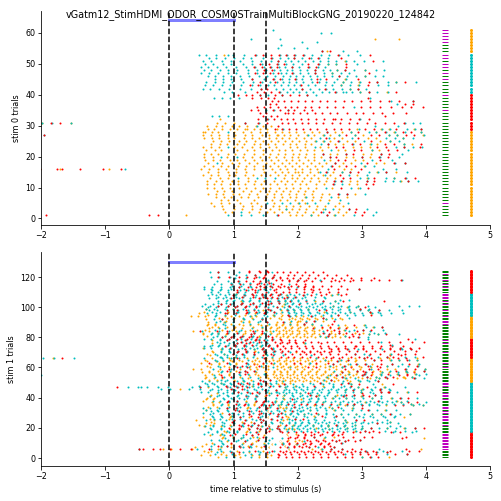

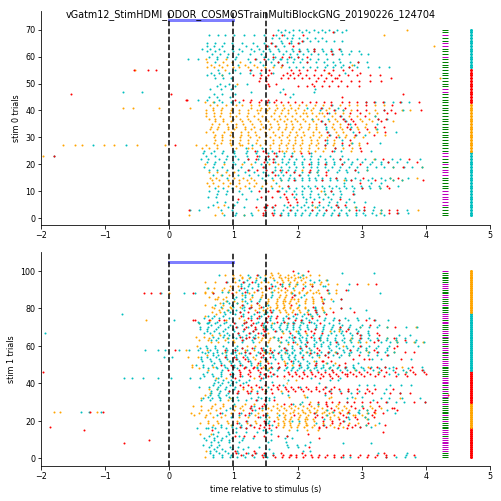

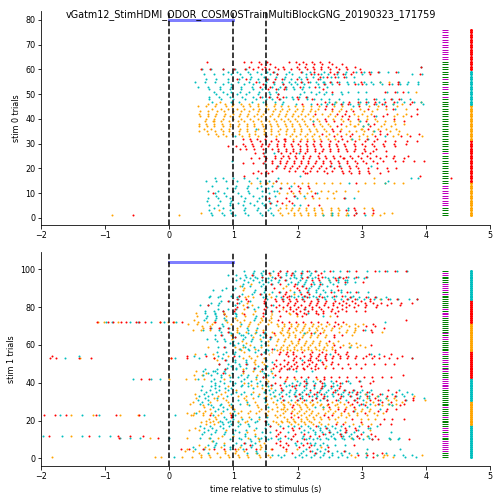

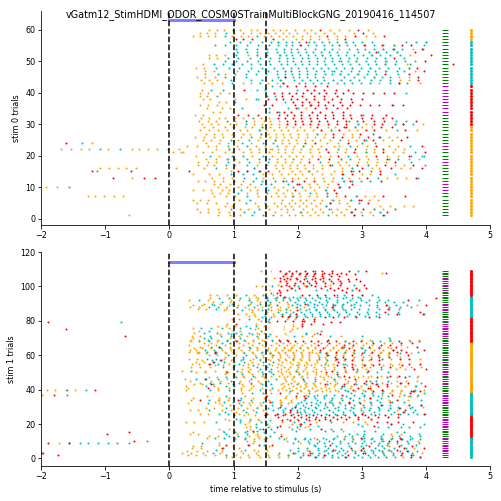

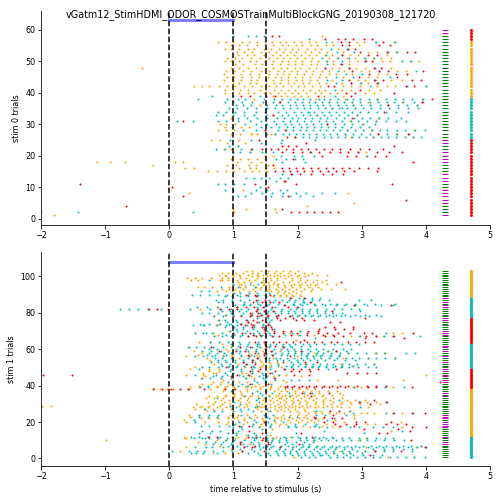

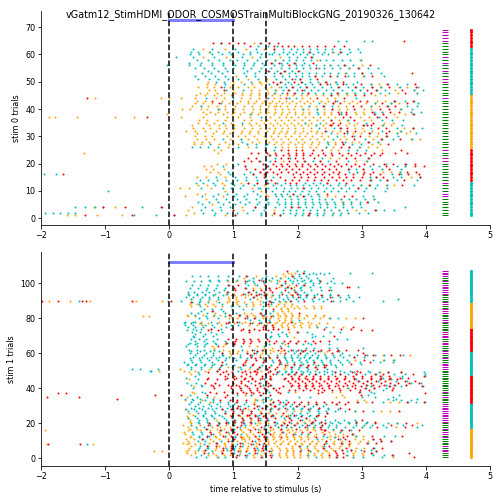

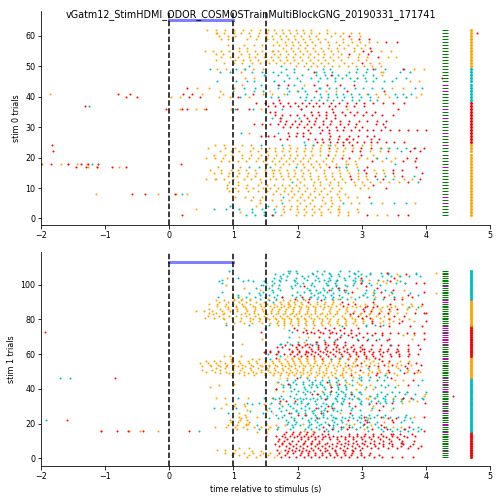

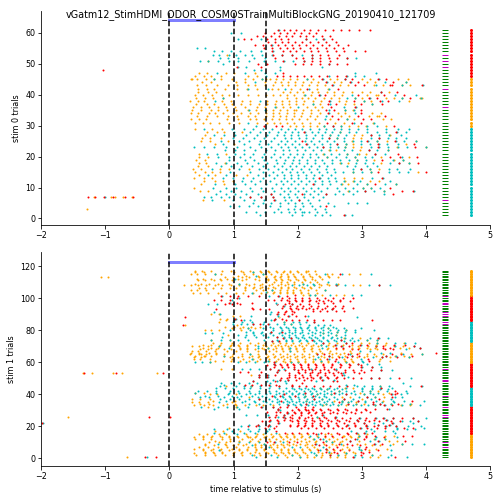

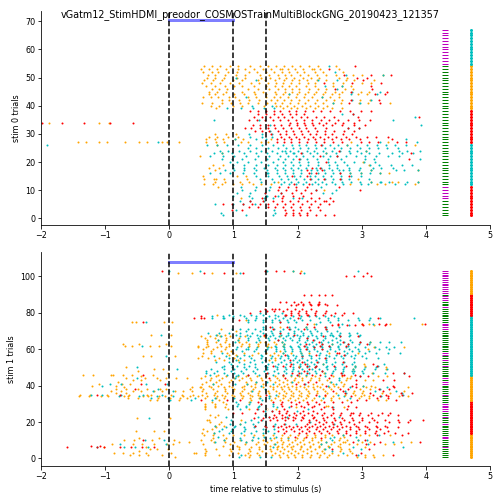

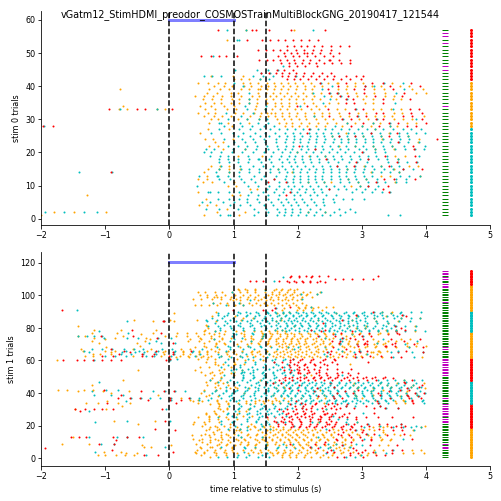

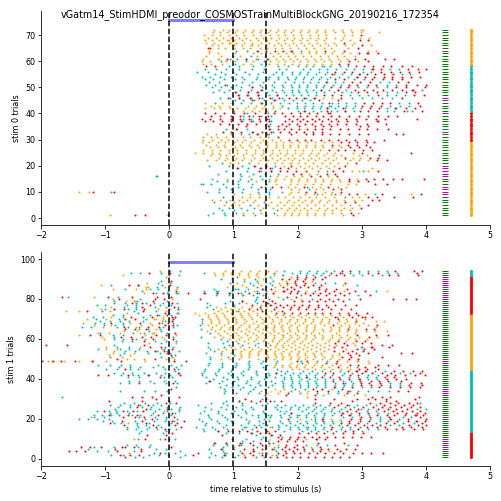

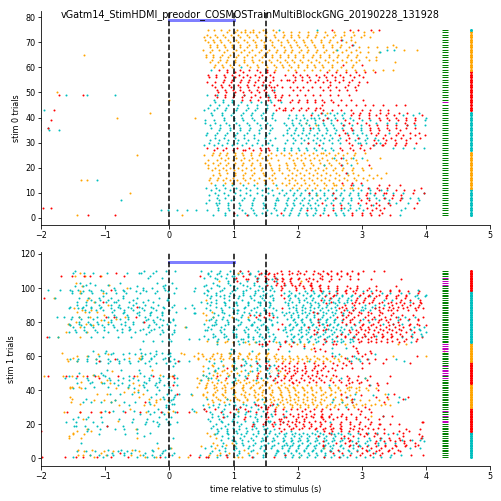

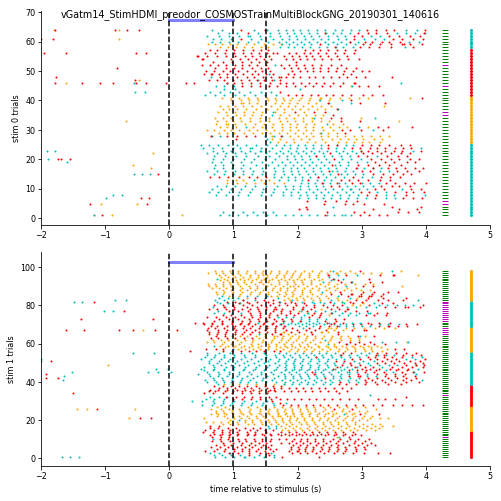

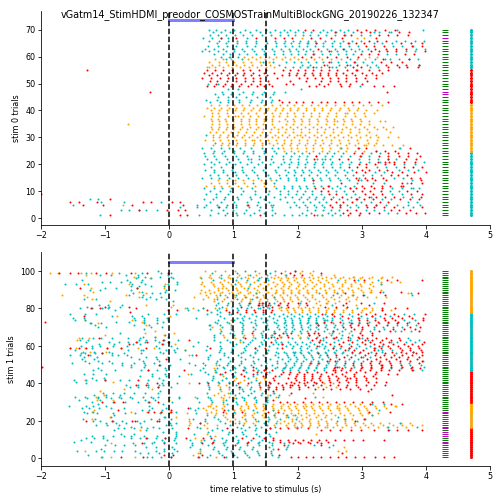

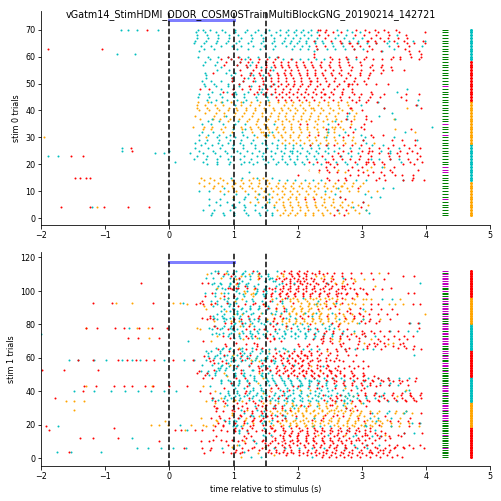

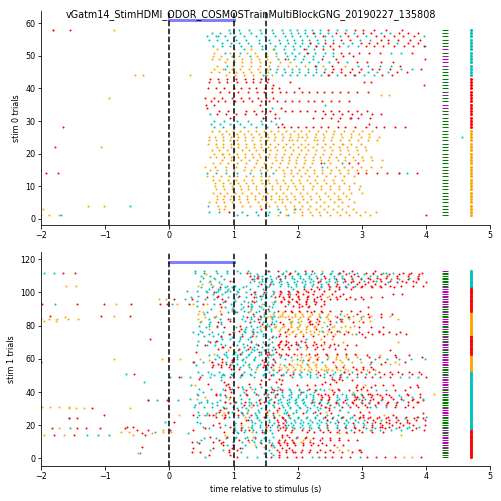

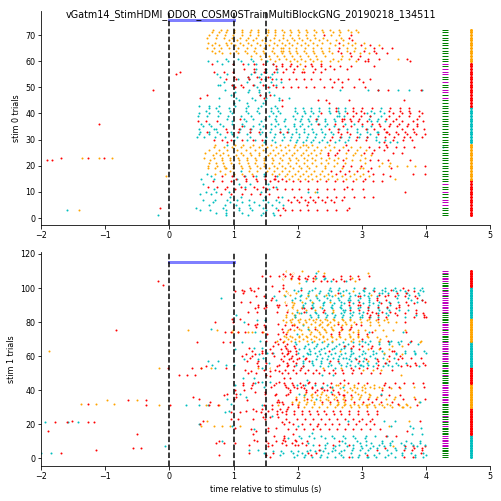

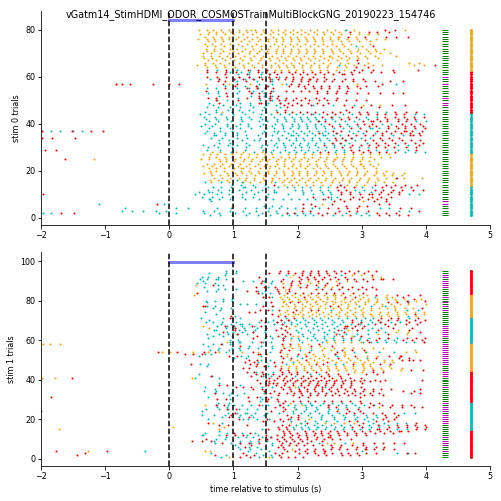

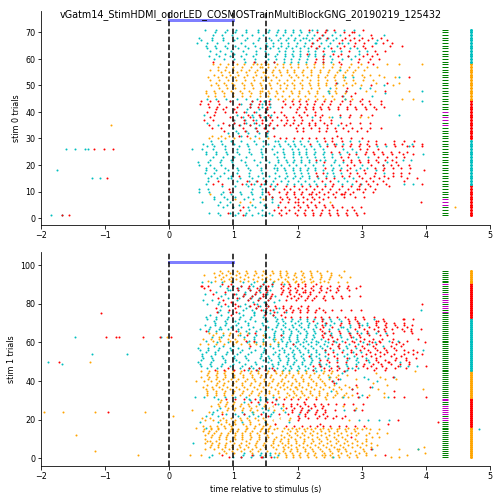

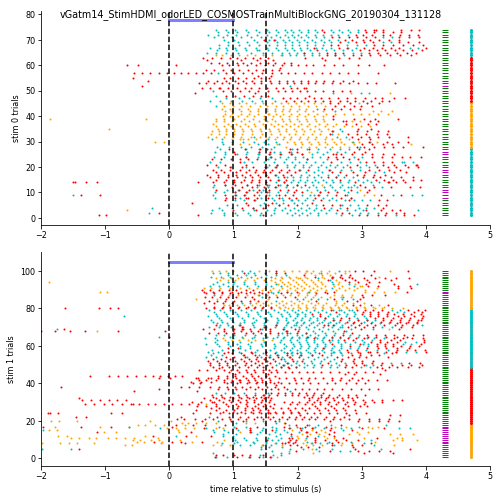

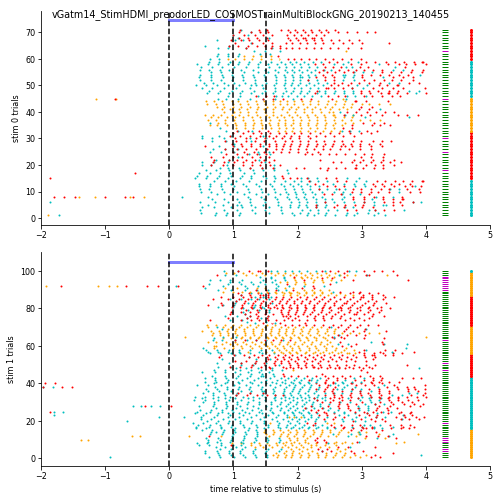

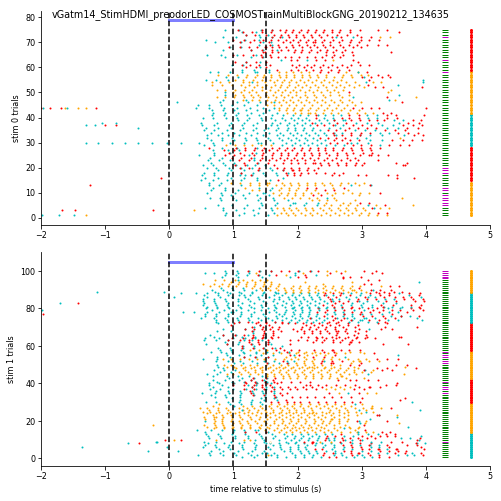

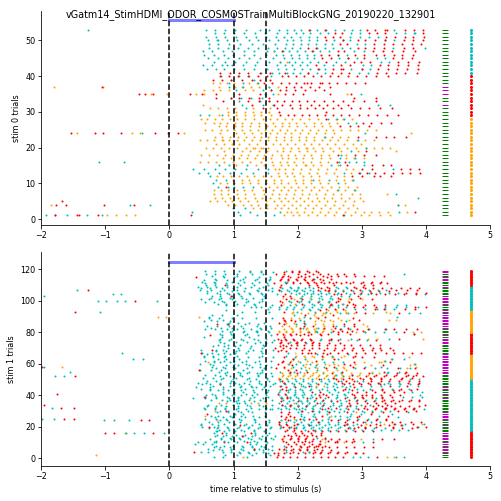

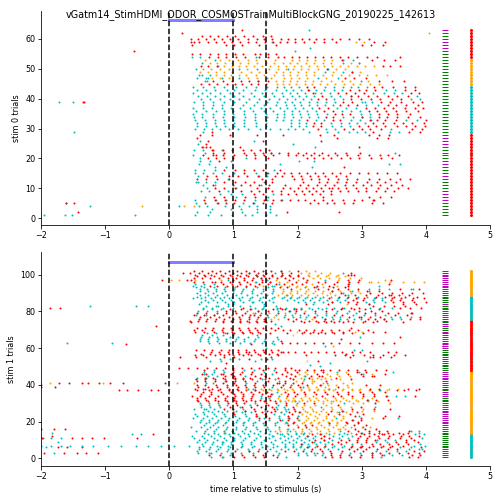

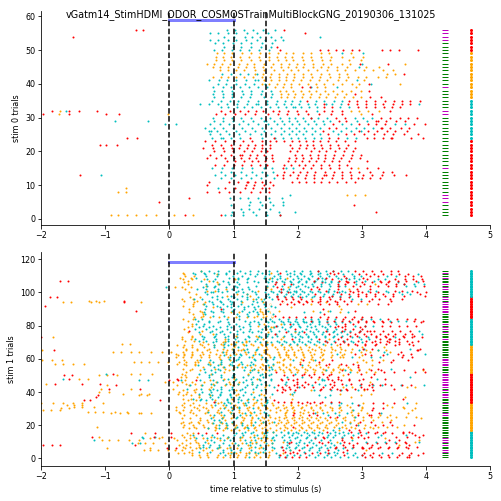

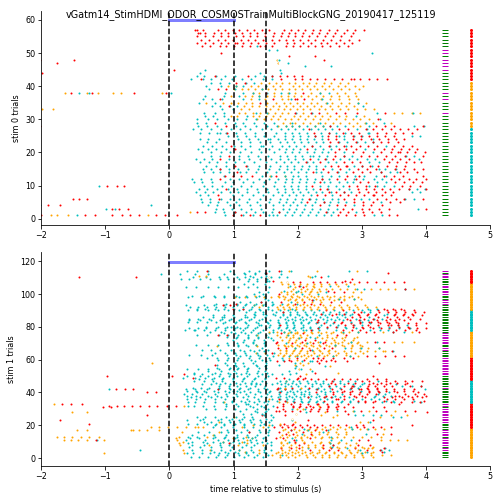

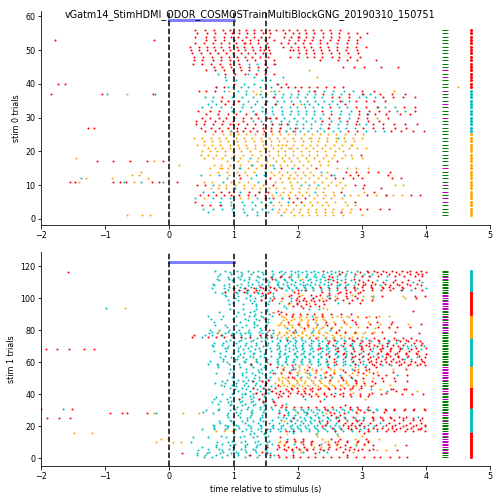

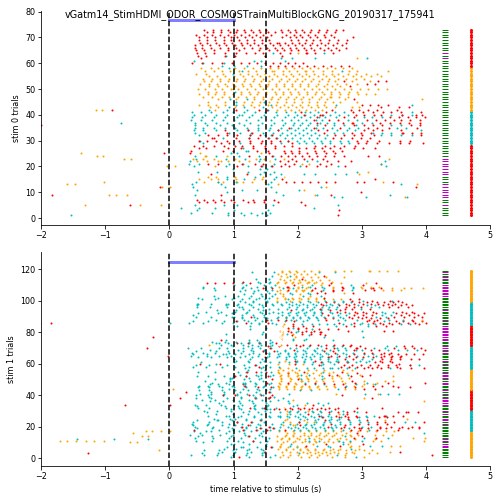

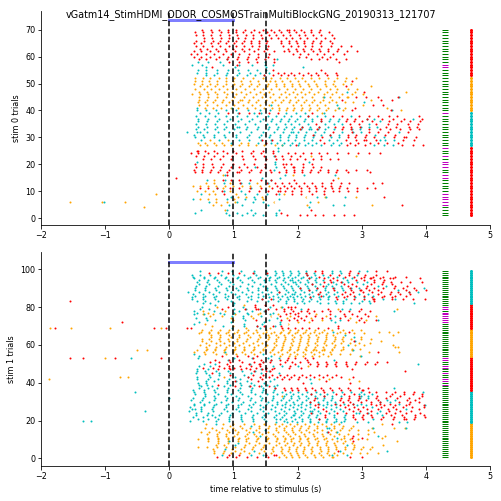

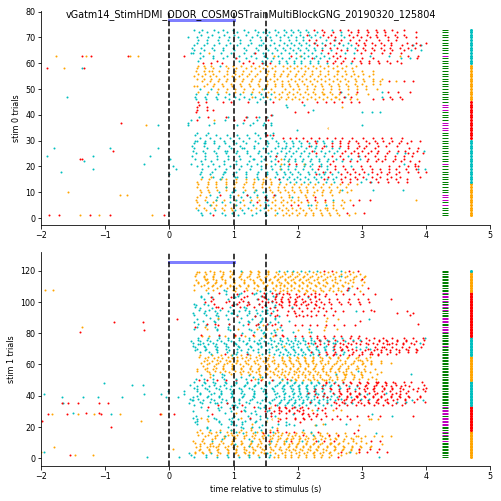

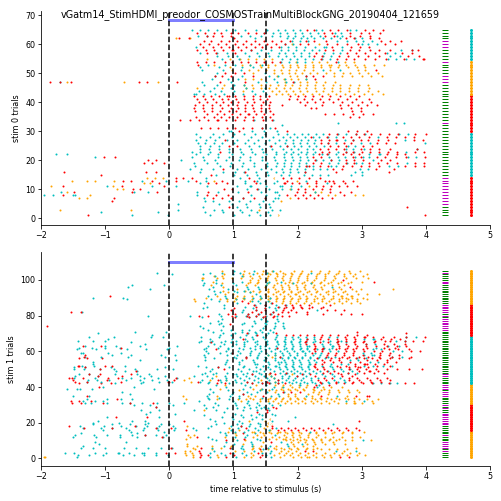

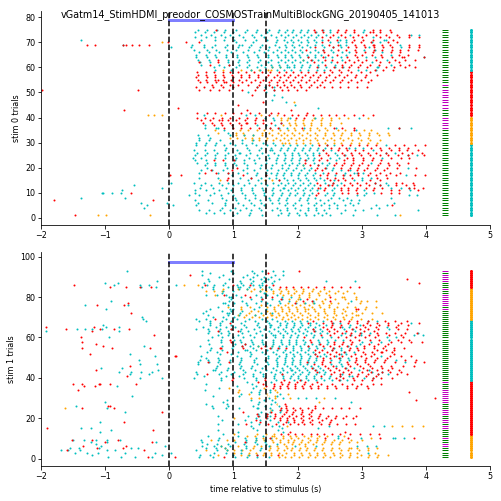

In [8]:
### Now load all datasets
os.makedirs(fig_save_path, exist_ok=True)

all_bd = []
for iter, d in enumerate(datasets):
    bpod_fname = d[0]
    stim_pattern = d[1]
    mouse_name = d[2]
    behavior_path = bi.get_full_bpod_path(base_path, bpod_fname)
    print(behavior_path)
    
    bd = BpodDataset(behavior_path, load_fig_save_path)
    all_bd.append(bd)
    
    bd.suffix = '.png'
    bd.plot_lick_times(alt_colors=True, underlay_stim_trials=True)
    bd.plot_stim_licks()
    plt.suptitle(bpod_fname)

### PLOT AVERAGED LICKS

In [12]:
#### Organize all licks, for each mouse, into dict: first layer is stim, second layer is active spout, third
### layer is the licked spout.
### --> all_mean_licks_by_stim[dataset_id][stim_or_nostim][target_spout] = nspouts x time array

all_mean_licks_by_stim = []

inds = np.arange(len(all_bd))
for kk in inds:
    bd = all_bd[kk]
    d = datasets[kk]
    
    include_trials = ou.get_included_trials(bd, min_trial=15, max_trial=190)
    mean_licks_by_stim = ou.get_mean_licks_by_stim(bd, include_trials, smooth=11)
    all_mean_licks_by_stim.append(mean_licks_by_stim)

In [13]:
%pdb

Automatic pdb calling has been turned ON


Total peri-odor licks (across all spouts)
pvals uncorrected:
[0.0008 0.3409 0.0159 0.368  0.0208 0.0694 0.3237 0.7199]
pvals fdr-bh:
[0.0061 0.4205 0.0554 0.4205 0.0554 0.1387 0.4205 0.7199]
Total post-reward licks (across all spouts)
pvals uncorrected:
[0.0019 0.2642 0.9772 0.8749 0.9505 0.6105 0.9739 0.738 ]
pvals fdr-bh:
[0.0154 0.9772 0.9772 0.9772 0.9772 0.9772 0.9772 0.9772]


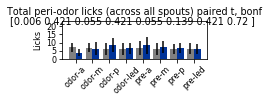

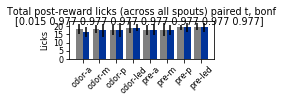

In [17]:
### Plot total licks (across all spouts) in stim/no stim, bar plot, one datapoint per session
peri_odor_frames = np.arange(65, 105)
reward_frames = np.arange(110, 140)
# patterns = ['pre-m', 'pre-a',  'pre-led', 'odor-m', 'odor-a', 'odor-p', 
#             'odor-led',  'odor-lat', 'odor-s', 'odor-v', 'pre-p']
patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led', 'pre-a', 'pre-m', 'pre-p', 'pre-led']

all_peri_odor_licks_by_stim = dict()
all_reward_licks_by_stim = dict()
for pattern in patterns:
    inds = ou.get_dataset_by_property(datasets, pattern)
    joined_licks_by_stim = ou.concatenate_across_mice_licks_by_stim(all_mean_licks_by_stim, 
                                                                    datasets, 
                                                                    which_mice=['m12', 'm14', 'm15', 'm16', 'm17'], 
                                                                    inds=inds)
    
    joined_licks_all_spouts_by_stim = dict() # keys: 0 (nostim), 1 (stim)
    for i in joined_licks_by_stim.keys():
        joined_licks_all_spouts_by_stim[i] = np.sum(joined_licks_by_stim[i][1]
                                                    + joined_licks_by_stim[i][3]
                                                    + joined_licks_by_stim[i][4], 
                                                   axis=0)
        
    peri_odor_licks_by_stim = dict()
    reward_licks_by_stim = dict()
    for i in joined_licks_by_stim.keys():
        peri_odor_licks_by_stim[i] = np.mean(joined_licks_all_spouts_by_stim[i][peri_odor_frames, :], 
                                             axis=0)
        reward_licks_by_stim[i] = np.mean(joined_licks_all_spouts_by_stim[i][reward_frames, :], 
                                          axis=0)
    all_peri_odor_licks_by_stim[pattern] = peri_odor_licks_by_stim
    all_reward_licks_by_stim[pattern] = reward_licks_by_stim  

pvals = ou.plot_total_licks_by_stim(all_peri_odor_licks_by_stim, patterns,
                                    title_str='Total peri-odor licks (across all spouts)',
                                    width=0.4)
plt.gcf().set_size_inches(w=2.6, h=.7) # Control size of figure in inches
plt.ylim([0, 23])
plt.gca().set_yticks([0, 5, 10, 15, 20])
save_path = os.path.join(fig_save_path, 'stim_nostim_total_licks_peri_odor.pdf'.format(pattern))
plt.savefig(save_path)

pvals = ou.plot_total_licks_by_stim(all_reward_licks_by_stim, patterns,
                                    title_str='Total post-reward licks (across all spouts)',
                                    width=0.4)
plt.ylim([0, 23])
plt.gca().set_yticks([0, 5, 10, 15, 20])
plt.gcf().set_size_inches(w=2.6, h=.7) # Control size of figure in inches
save_path = os.path.join(fig_save_path, 'stim_nostim_total_licks_post_reward.pdf'.format(pattern))
plt.savefig(save_path)

    
    

/home/user/anaconda3/envs/cosmostools3_keras222_mplt21_2/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


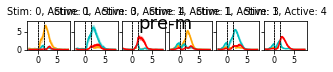

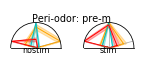

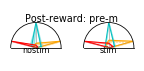

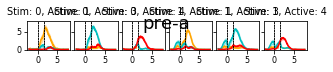

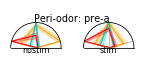

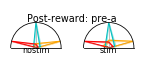

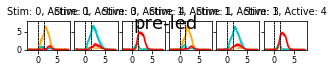

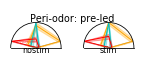

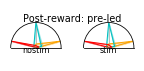

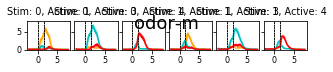

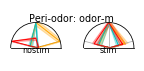

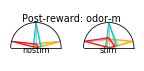

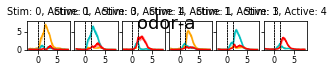

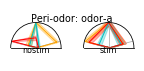

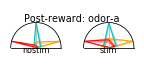

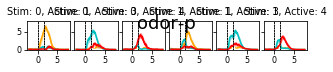

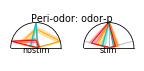

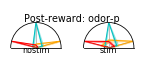

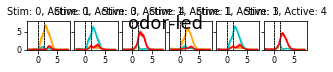

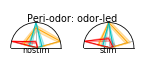

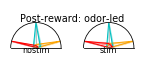

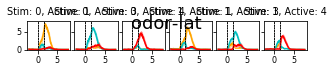

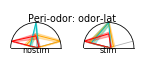

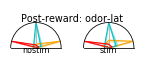

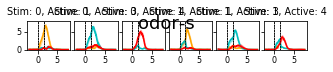

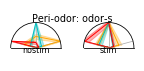

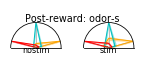

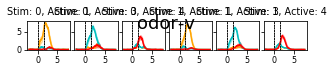

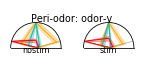

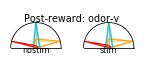

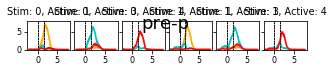

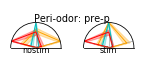

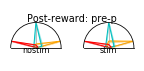

In [18]:
### Plot average licks, averaged across mice, for different conditions
peri_odor_frames = np.arange(65, 105)
reward_frames = np.arange(110, 140)
for pattern in ['pre-m', 'pre-a',  'pre-led', 'odor-m', 'odor-a', 'odor-p', 'odor-led',  'odor-lat', 'odor-s', 'odor-v', 'pre-p']:
    inds = ou.get_dataset_by_property(datasets, pattern)
    joined_licks_by_stim = ou.concatenate_across_mice_licks_by_stim(all_mean_licks_by_stim, 
                                                                    datasets, 
                                                                    which_mice=['m12', 'm14', 'm15', 'm16', 'm17'], 
                                                                    inds=inds)
    
    ### Now make all of the plots
    
    ### Lick line plots
    ou.plot_mean_across_mice_licks_by_stim(joined_licks_by_stim, event_times=[0, 1.5])
    plt.suptitle(pattern, fontsize=18)
    plt.tight_layout()
    plt.gcf().set_size_inches(w=4, h=.6) # Control size of figure in inches
    save_path = os.path.join(fig_save_path, 'licks_across_mice_{}.pdf'.format(pattern))
    plt.savefig(save_path)

    ### Lick polar plots
    ou.polar_lick_plot_across_mice(joined_licks_by_stim, frame_range=peri_odor_frames)
    st = plt.suptitle('Peri-odor: {}'.format(pattern))
    st.set_position([0.56, .94]) # Control title position (as fraction of subplot)
    plt.gcf().set_size_inches(w=2.6, h=.7) # Control size of figure in inches
    save_path = os.path.join(fig_save_path, 'polar_peri_odor_{}.pdf'.format(pattern))
    plt.savefig(save_path)
    
    ### Lick polar plots
    ou.polar_lick_plot_across_mice(joined_licks_by_stim, frame_range=reward_frames)
    st = plt.suptitle('Post-reward: {}'.format(pattern))
    st.set_position([0.56, .94]) # Control title position (as fraction of subplot)
    plt.gcf().set_size_inches(w=2.6, h=.7) # Control size of figure in inches
    save_path = os.path.join(fig_save_path, 'polar_post_reward_{}.pdf'.format(pattern))
    plt.savefig(save_path)


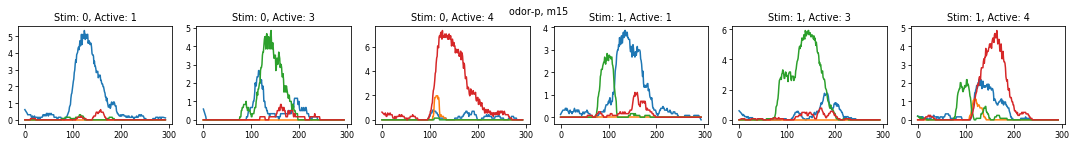

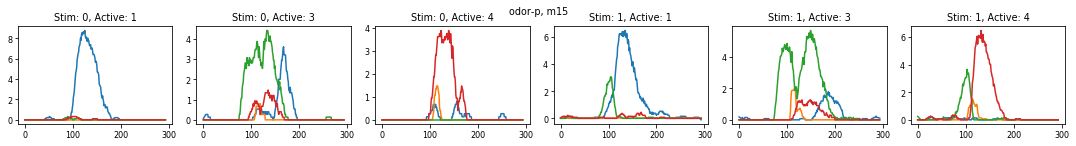

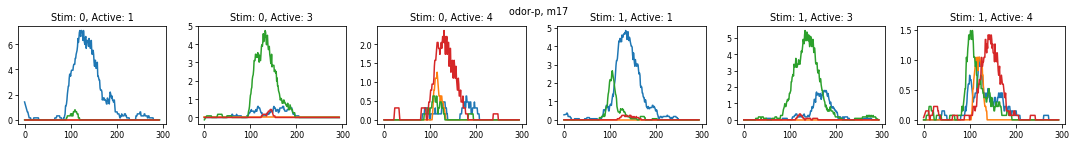

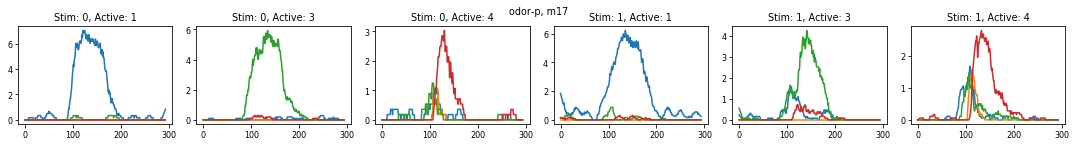

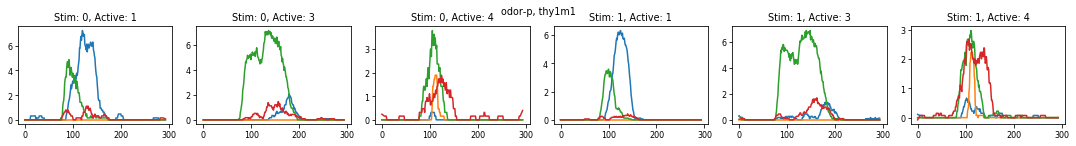

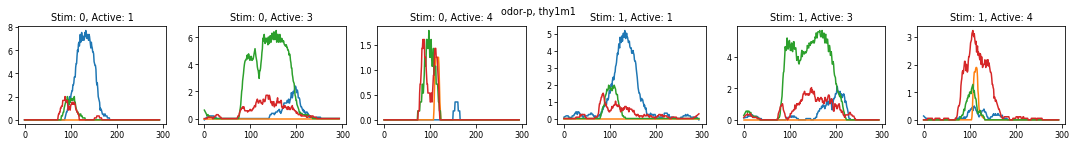

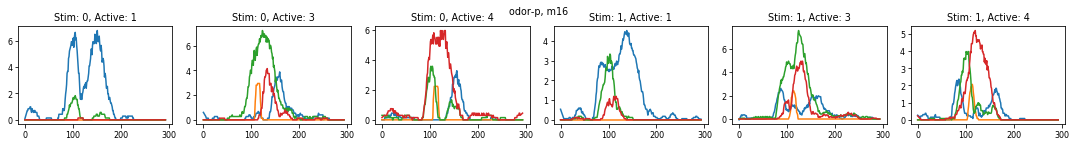

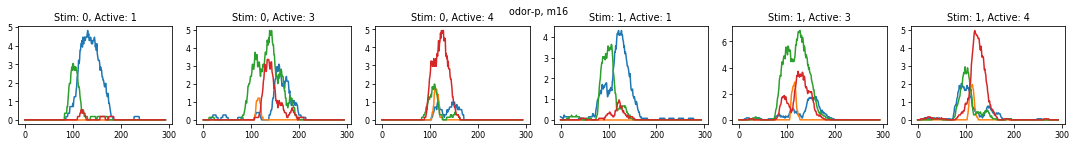

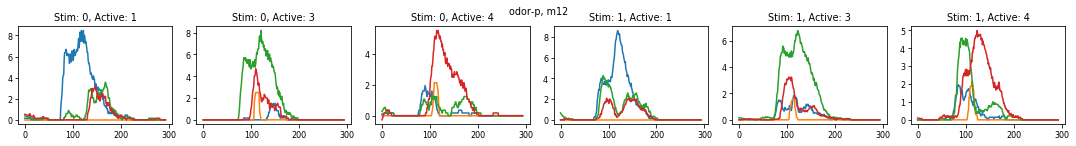

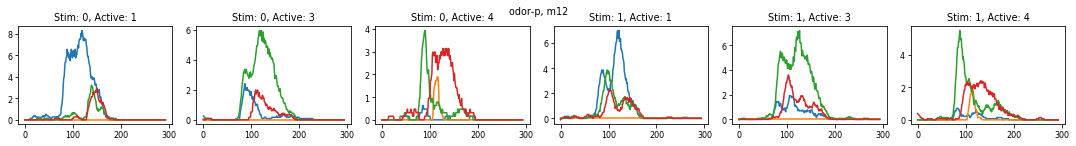

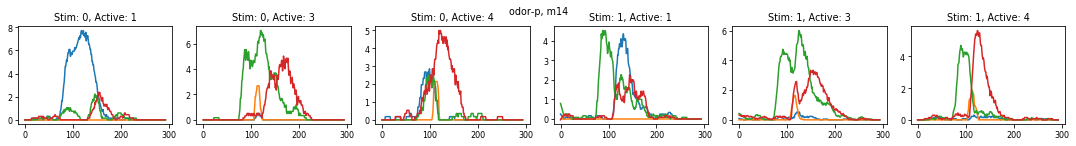

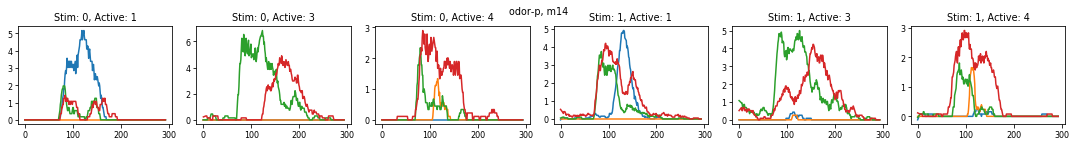

In [19]:
### Plot average licks for individual mice. 
inds = ou.get_dataset_by_property(datasets, 'odor-p')
ou.plot_mean_licks_by_stim(all_mean_licks_by_stim, datasets, inds)

In [20]:
bd.trial_types == 4

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

### ORGANIZE AND PLOT ALL DATA

Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 33
Just including go
Total go trials 142
Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 29
Just including go
Total go trials 146
Just including nogo
Total nogo trials 34
Just including go
Total go trials 141
Just including nogo
Total nogo trials 29
Just including go
Total go trials 146
Just including nogo
Total nogo trials 38
Just including go
Total go trials 137
Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 17
Just including go
Total go trials 158
Just including nogo
Total nogo trials 32
Just including go
Total go trials 143
Just including nogo
Total nogo trials 25
Just including go
Total go trials 150
Just including nogo
Total nogo trials 29
Just includ

Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 36
Just including go
Total go trials 139
Just including nogo
Total nogo trials 36
Just including go
Total go trials 139
Just including nogo
Total nogo trials 21
Just including go
Total go trials 154
Just including nogo
Total nogo trials 23
Just including go
Total go trials 152
Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 29
Just including go
Total go trials 146
Just including nogo
Total nogo trials 25
Just including go
Total go trials 150
Just including nogo
Total nogo trials 30
Just including go
Total go trials 145
Just including nogo
Total nogo trials 28
Just including go
Total go trials 147
Just including nogo
Total nogo trials 27
Just including go
Total go trials 148
Just including nogo
Total nogo trials 21
Just including go
Total go trials 154
Just including nogo
Total nogo trials 29
Just includ

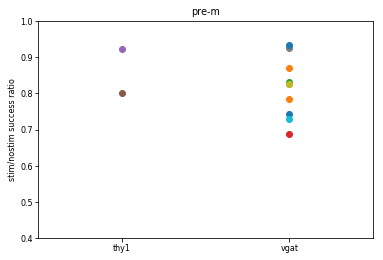

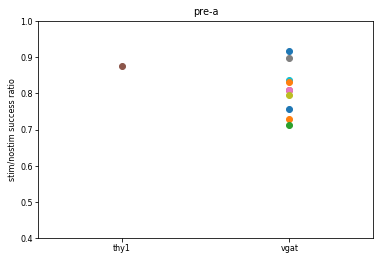

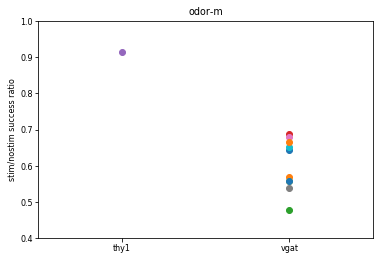

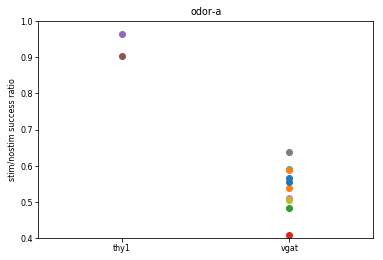

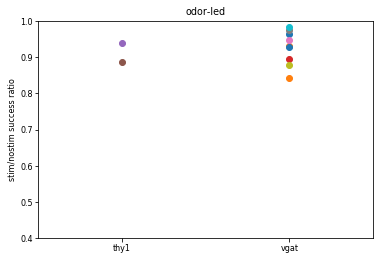

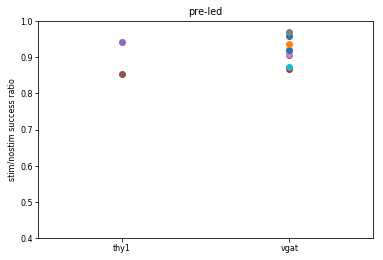

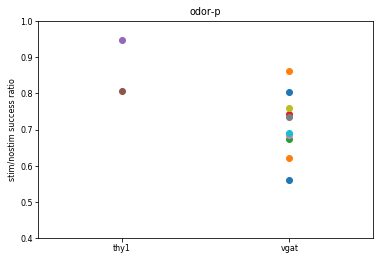

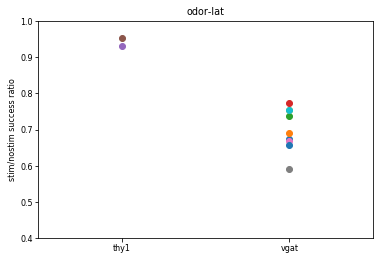

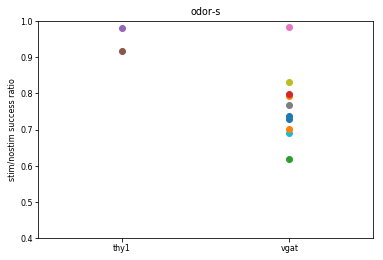

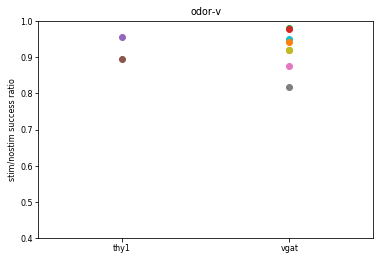

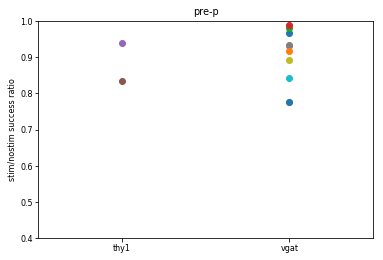

In [21]:
scores = ou.organize_stim_data_into_dataframe(all_bd, datasets,
                                              do_plot_all=True,
                                              do_plot_indiv=False)
    

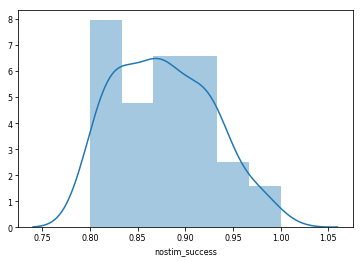

In [22]:
### Plot all scores to ensure that they are above 80%
sns.distplot(np.round(100*scores['nostim_success'])/100)
save_path = os.path.join(fig_save_path,'nostim_success_distribution.pdf')
plt.savefig(save_path)

In [23]:
scores

Control  Control_stim   Mouse Pattern  Pre  g_nostim_success  \
0        0.0           0.0     m15   pre-m  1.0          0.785714   
1        0.0           0.0     m15   pre-m  1.0          1.000000   
2        0.0           0.0     m17   pre-m  1.0          0.851064   
3        0.0           0.0     m17   pre-m  1.0          0.809524   
4        1.0           0.0  thy1m1   pre-m  1.0          0.847826   
5        1.0           0.0  thy1m1   pre-m  1.0          0.851064   
6        0.0           0.0     m16   pre-m  1.0          0.847826   
7        0.0           0.0     m16   pre-m  1.0          0.825000   
8        0.0           0.0     m12   pre-m  1.0          0.815789   
9        0.0           0.0     m12   pre-m  1.0          0.934426   
10       0.0           0.0     m14   pre-m  1.0          0.807692   
11       0.0           0.0     m14   pre-m  1.0          0.978723   
12       0.0           0.0     m15   pre-a  1.0          0.913043   
13       0.0           0.0     m15   pre-a  1.0          0.790698   
14       0.0           0.0     m17   pre-a  1.0          0.925926   
15       0.0           0.0     m17   pre-a  1.0          0.869565   
16       1.0           0.0  thy1m1   pre-a  1.0          0.765957   
17       1.0           0.0  thy1m1   pre-a  1.0          0.882353   
18       0.0           0.0     m16   pre-a  1.0          0.761905   
19       0.0           0.0     m16   pre-a  1.0          0.804348   
20       0.0           0.0     m12   pre-a  1.0          0.818182   
21       0.0           0.0     m12   pre-a  1.0          0.844444   
22       0.0           0.0     m14   pre-a  1.0          0.913043   
23       0.0           0.0     m14   pre-a  1.0          0.892857   
24       0.0           0.0     m15  odor-m  0.0          0.781818   
25       0.0           0.0     m15  odor-m  0.0          0.892857   
26       0.0           0.0     m17  odor-m  0.0          0.909091   
27       0.0           0.0     m17  odor-m  0.0          0.765957   
28       1.0           0.0  thy1m1  odor-m  0.0          0.800000   
29       1.0           0.0  thy1m1  odor-m  0.0          0.786885   
..       ...           ...     ...     ...  ...               ...   
102      0.0           0.0     m16  odor-s  0.0          0.777778   
103      0.0           0.0     m16  odor-s  0.0          0.791667   
104      0.0           0.0     m12  odor-s  0.0          0.857143   
105      0.0           0.0     m12  odor-s  0.0          0.816327   
106      0.0           0.0     m14  odor-s  0.0          0.866667   
107      0.0           0.0     m14  odor-s  0.0          0.844444   
108      0.0           0.0     m15  odor-v  0.0          0.862745   
109      0.0           0.0     m15  odor-v  0.0          0.880952   
110      0.0           0.0     m17  odor-v  0.0          0.857143   
111      0.0           0.0     m17  odor-v  0.0          0.816327   
112      1.0           0.0  thy1m1  odor-v  0.0          0.822581   
113      1.0           0.0  thy1m1  odor-v  0.0          0.960784   
114      0.0           0.0     m16  odor-v  0.0          0.761905   
115      0.0           0.0     m16  odor-v  0.0          0.920000   
116      0.0           0.0     m12  odor-v  0.0          0.815789   
117      0.0           0.0     m12  odor-v  0.0          0.895833   
118      0.0           0.0     m14  odor-v  0.0          0.803922   
119      0.0           0.0     m14  odor-v  0.0          0.850000   
120      0.0           0.0     m15   pre-p  1.0          0.852459   
121      0.0           0.0     m15   pre-p  1.0          0.919355   
122      0.0           0.0     m17   pre-p  1.0          0.803571   
123      0.0           0.0     m17   pre-p  1.0          0.850000   
124      1.0           0.0  thy1m1   pre-p  1.0          0.936170   
125      1.0           0.0  thy1m1   pre-p  1.0          0.804878   
126      0.0           0.0     m16   pre-p  1.0          0.868421   
127      0.0           0.0     m16   pre-p  1.0          0.892857   
128

### SUMMARIZE PERFORMANCE ACROSS MICE

In [24]:
mean_scores = scores.groupby(['Mouse', 'Pattern'], as_index=False).mean()

In [25]:
mouse_colors_dict = {'m12': '#E400E0',
                     'm14': '#F493F2',
                     'm15': '#9600CD',
                     'm16': '#5416B4',
                     'm17': '#B94CE1',
                     'thy1m1': 'k'}

mean_scores.loc[(mean_scores['Pattern'] == pattern)]


In [26]:
%pdb

Automatic pdb calling has been turned OFF


Before fdr correction: [2.06354775e-04 3.08802111e-05 1.94243237e-03 2.56775140e-03
 2.68292534e-02 4.80599998e-02 2.08143587e-02 2.86553669e-01]
PERI-ODOR: ttest-rel, fdr_bh success_ratio: a/l: 0.000825, m/l: 0.000247, p/l: 0.00514, s/l: 0.00514, a/m: 0.0358, m/p: 0.0549, a/p: 0.0333, p/s: 0.287, 
Before fdr correction: [0.0227252  0.03271741 0.35945148]
PRE-ODOR: ttest-rel, fdr_bh a/l: 0.0491, m/l: 0.0491, p/l: 0.359, 


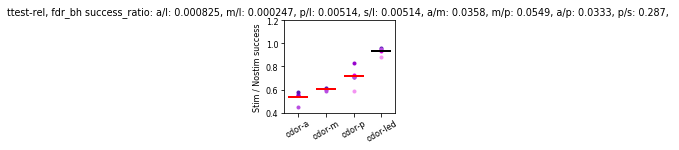

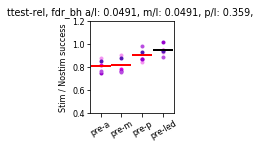

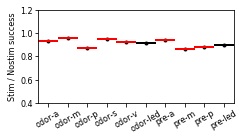

In [27]:
### Generate the performance plot for each stim pattern    
### Compute p-values using t-test (for related variables)

patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led'] # 'odor-s', 'odor-v'
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='peri-odor', which_stat='success_ratio')
print('PERI-ODOR: {}'.format(pval_str))
ou.plot_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest')
plt.title(pval_str)
plt.gcf().set_size_inches(w=2, h=1.7) # Control size of figure in inches
save_path = os.path.join(fig_save_path,'performance_across_mice_odor.pdf')
plt.savefig(save_path)

patterns = ['pre-a', 'pre-m', 'pre-p', 'pre-led']
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='pre-odor', which_stat='success_ratio')
print('PRE-ODOR: {}'.format(pval_str))
ou.plot_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest')
plt.title(pval_str)
plt.gcf().set_size_inches(w=3/2, h=1.7) # Control size of figure in inches
save_path = os.path.join(fig_save_path,'performance_across_mice_pre.pdf')
plt.savefig(save_path)

patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-s', 'odor-v', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
which_mice = ['thy1m1']
ou.plot_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest')
plt.gcf().set_size_inches(w=7/2, h=1.7) # Control size of figure in inches
save_path = os.path.join(fig_save_path,'performance_across_mice_thy1.pdf')
plt.savefig(save_path)

Before fdr correction: [2.77402791e-04 3.74219435e-05 2.70882960e-03 4.34127532e-03
 1.37989668e-02 7.10037432e-02 2.53847296e-02 3.61363857e-01]
PERI-ODOR: ttest-rel, fdr_bh success_diff: a/l: 0.00111, m/l: 0.000299, p/l: 0.00722, s/l: 0.00868, a/m: 0.0221, m/p: 0.0811, a/p: 0.0338, p/s: 0.361, 
Before fdr correction: [0.02452572 0.03512457 0.40007411]
PRE-ODOR: ttest-rel, fdr_bh a/l: 0.0527, m/l: 0.0527, p/l: 0.4, 


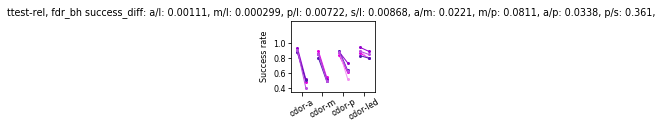

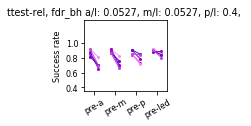

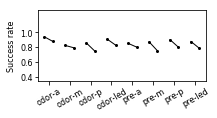

In [28]:
### Generate the performance plot for each stim pattern with raw accuracy
### Compute p-values using t-test (for related variables)

patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led'] # 'odor-s', 'odor-v'
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='peri-odor', which_stat='success_diff')
print('PERI-ODOR: {}'.format(pval_str))
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='stim_success', stat2='nostim_success')
plt.title(pval_str)
plt.gcf().set_size_inches(w=1.5, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_performance_across_mice_odor.pdf')
plt.savefig(save_path)

patterns = ['pre-a', 'pre-m', 'pre-p', 'pre-led']
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='pre-odor', which_stat='success_diff')
print('PRE-ODOR: {}'.format(pval_str))
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='stim_success', stat2='nostim_success')
plt.title(pval_str)
plt.gcf().set_size_inches(w=1.5, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_performance_across_mice_pre.pdf')
plt.savefig(save_path)

# patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-s', 'odor-v', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
which_mice = ['thy1m1']
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='stim_success', stat2='nostim_success')
plt.gcf().set_size_inches(w=3, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_performance_across_mice_thy1.pdf')
plt.savefig(save_path)

Before fdr correction: [0.00047005 0.00026815 0.02530465 0.00745891 0.10401481 0.00433354
 0.00105246 0.26465492]
PERI-ODOR: ttest-rel, fdr_bh ng_success_diff: a/l: 0.00188, m/l: 0.00188, p/l: 0.0337, s/l: 0.0119, a/m: 0.119, m/p: 0.00867, a/p: 0.00281, p/s: 0.265, 
Before fdr correction: [0.56861619 0.69556144 0.75079299]
PRE-ODOR: ttest-rel, fdr_bh a/l: 0.751, m/l: 0.751, p/l: 0.751, 


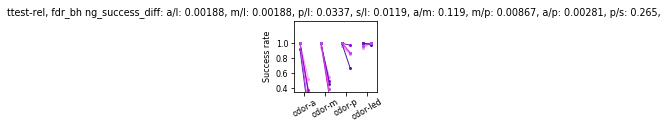

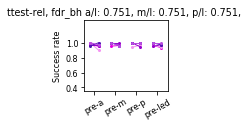

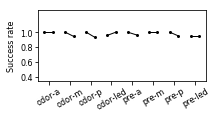

In [29]:
### Performance on just nogo trials

patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led'] # 'odor-s', 'odor-v'
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='peri-odor', which_stat='ng_success_diff')
print('PERI-ODOR: {}'.format(pval_str))
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='ng_stim_success', stat2='ng_nostim_success')
plt.title(pval_str)
plt.gcf().set_size_inches(w=1.5, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_ng_performance_across_mice_odor.pdf')
plt.savefig(save_path)

patterns = ['pre-a', 'pre-m', 'pre-p', 'pre-led']
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='pre-odor', which_stat='ng_success_diff')
print('PRE-ODOR: {}'.format(pval_str))
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='ng_stim_success', stat2='ng_nostim_success')
plt.title(pval_str)
plt.gcf().set_size_inches(w=1.5, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_ng_performance_across_mice_pre.pdf')
plt.savefig(save_path)

# patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-s', 'odor-v', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
which_mice = ['thy1m1']
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='ng_stim_success', stat2='ng_nostim_success')
plt.gcf().set_size_inches(w=3, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_ng_performance_across_mice_thy1.pdf')
plt.savefig(save_path)

Before fdr correction: [3.57366350e-04 1.64718548e-05 2.72107171e-03 4.01421076e-03
 4.95700366e-02 1.99015312e-01 7.45947571e-02 5.83094132e-01]
PERI-ODOR: ttest-rel, fdr_bh g_success_diff: a/l: 0.00143, m/l: 0.000132, p/l: 0.00726, s/l: 0.00803, a/m: 0.0793, m/p: 0.227, a/p: 0.0995, p/s: 0.583, 
Before fdr correction: [0.02580676 0.0343743  0.40777409]
PRE-ODOR: ttest-rel, fdr_bh a/l: 0.0516, m/l: 0.0516, p/l: 0.408, 


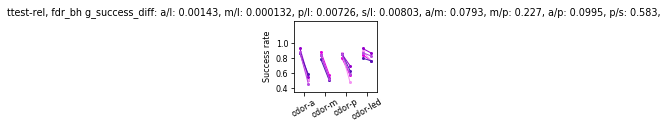

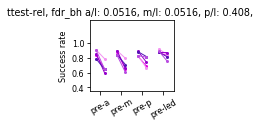

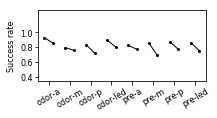

In [30]:
### Performance on just go trials

patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led'] # 'odor-s', 'odor-v'
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='peri-odor', which_stat='g_success_diff')
print('PERI-ODOR: {}'.format(pval_str))
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                           stat1='g_stim_success', stat2='g_nostim_success')
plt.title(pval_str)
plt.gcf().set_size_inches(w=1.5, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_g_performance_across_mice_odor.pdf')
plt.savefig(save_path)

patterns = ['pre-a', 'pre-m', 'pre-p', 'pre-led']
which_mice = ['m12', 'm14', 'm15', 'm16', 'm17']
pval_str = ou.get_stim_pvals(mean_scores, patterns, which_mice, 
                             which_comparison='pre-odor', which_stat='g_success_diff')
print('PRE-ODOR: {}'.format(pval_str))
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='g_stim_success', stat2='g_nostim_success')
plt.title(pval_str)
plt.gcf().set_size_inches(w=1.5, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_g_performance_across_mice_pre.pdf')
plt.savefig(save_path)

# patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-s', 'odor-v', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
patterns = ['odor-a', 'odor-m', 'odor-p', 'odor-led', 'pre-a', 'pre-m',  'pre-p', 'pre-led']
which_mice = ['thy1m1']
ou.plot_raw_stim_performance(patterns, which_mice, mean_scores, mouse_colors_dict, p_method='ttest',
                            stat1='g_stim_success', stat2='g_nostim_success')
plt.gcf().set_size_inches(w=3, h=1.3) # Control size of figure in inches
plt.gca().set_yticks([0.4, 0.6, 0.8, 1.0])
save_path = os.path.join(fig_save_path,'raw_g_performance_across_mice_thy1.pdf')
plt.savefig(save_path)

/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm14/StimHDMI_ODOR_COSMOSTrainMultiBlockGNG/Session Data/vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_132901.mat
stim_interval  [2.2 3.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
/home/user/Dropbox/cosmos/fig_plots/fig8/inhib_results/stim_vs_nostim_session_vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_132901.pdf
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm14/StimHDMI_preodor_COSMOSTrainMultiBlockGNG/Session Data/vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190228_131928.mat
stim_interval  [0.  2.2]
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
/home/user/Dropbox/cosmos/fig_plots/fig8/inhib_results/stim_vs_nostim_session_vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190228_131928.pdf
/home/user/Dropbox/cosmos_data/Behavior_bpod_vgat/vGatm14/StimHDMI_ODOR_COSMOSTra

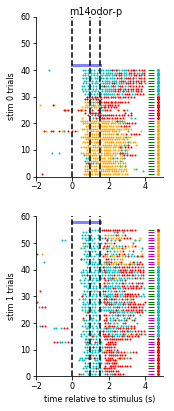

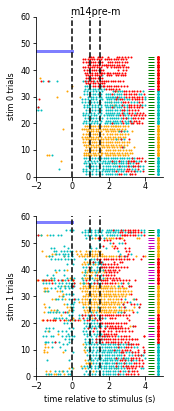

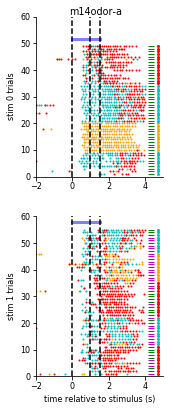

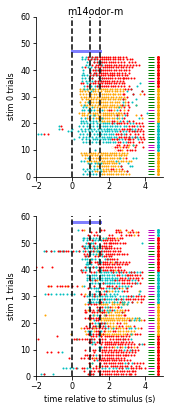

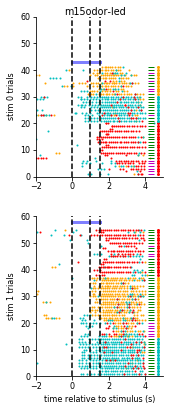

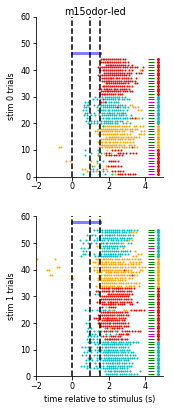

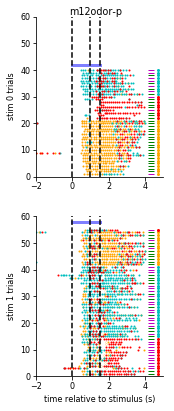

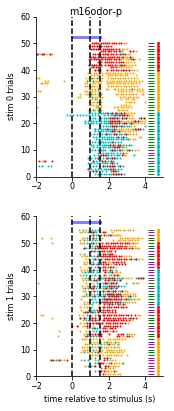

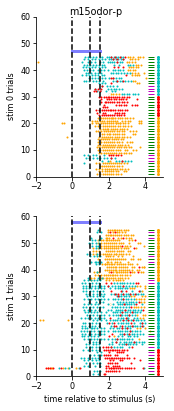

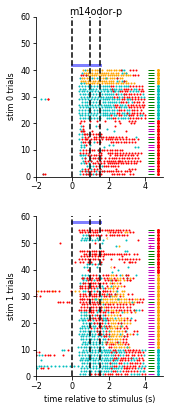

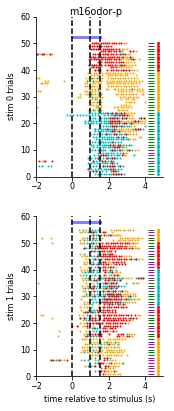

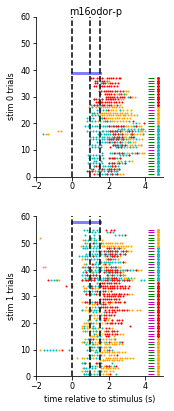

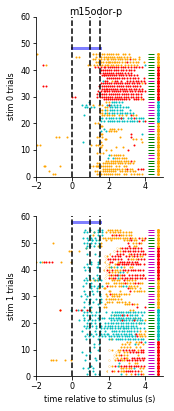

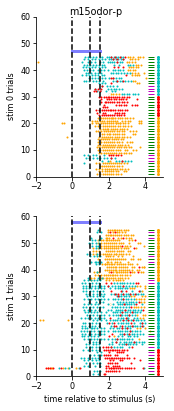

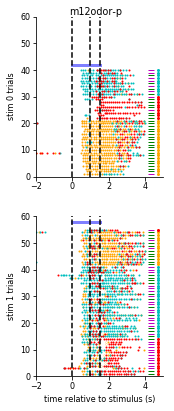

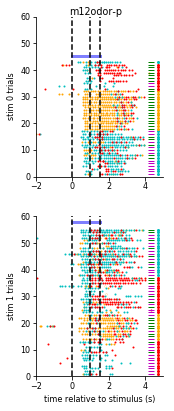

In [32]:
### Plot individual examples of lick rasters.

example_datasets = [
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_132901', 'odor-p','m14'],
    
    ['vGatm14_StimHDMI_preodor_COSMOSTrainMultiBlockGNG_20190228_131928', 'pre-m','m14'],
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190223_154746', 'odor-a','m14'],
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190214_142721', 'odor-m','m14'],
    ['m15_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190110_132947', 'odor-led','m15'],
    ['m15_StimHDMI_odorLED_COSMOSTrainMultiBlockGNG_20190206_132726', 'odor-led','m15'],

    ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_124842', 'odor-p','m12'],
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190210_180214', 'odor-p','m16'],
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190216_155741', 'odor-p','m15'],
    ['vGatm14_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190225_142613', 'odor-p','m14'],
    
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190210_180214', 'odor-p','m16'],
    ['Vgatm16_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190208_152754', 'odor-p','m16'],
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190124_142146', 'odor-p','m15'],
    ['vGatm15_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190216_155741', 'odor-p','m15'],
    ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190220_124842', 'odor-p','m12'],
    ['vGatm12_StimHDMI_ODOR_COSMOSTrainMultiBlockGNG_20190226_124704', 'odor-p','m12'],
]

include_explore_trials=False

for iter, d in enumerate(example_datasets):
    plt.figure()
    bpod_fname = d[0]
    stim_pattern = d[1]
    mouse_name = d[2]
    behavior_path = bi.get_full_bpod_path(base_path, bpod_fname)
    print(behavior_path)
    bd = BpodDataset(behavior_path, fig_save_path)

    if d[1].find('pre') != -1:
        stim_interval = [-2, 0]
    else:
        stim_interval = [0, 1.5]
#     bd.plot_stim_licks(fig_save_dir=None, stim_interval=stim_interval, max_trial=180, 
#                       max_subset_trial=65, include_explore_trials=True)
    bd.plot_stim_licks(fig_save_dir=None, stim_interval=stim_interval, max_trial=180, 
                      max_subset_trial=55, include_explore_trials=include_explore_tria)
    plt.suptitle(d[2] + d[1])
    plt.gcf().set_size_inches(w=2, h=6) # Control size of figure in inches
    save_path = os.path.join(fig_save_path, 
                             'stim_vs_nostim_session_{}.pdf'.format(d[0]))
    print(save_path)
    plt.savefig(save_path)



In [33]:
print('done')

done


In [34]:
raise('done')

TypeError: exceptions must derive from BaseException